<div style="text-align: center; font-size:30px; font-weight: bold;">
    Predicting the Future of Hotel Bookings: A Strategic Plan to Prevent Cancellations and Increase Revenue
</div>

<div style="text-align: center; font-size:20px; font-weight: bold;">
    MOH. KHISANUL FAKHRUDIN AKBAR (JCDS 0512)
</div>

____

# Business Problem Understanding

## Context

Pembatalan reservasi yang mendadak dapat menurunkan pendapatan dan menimbulkan kerugian pada hotel, karena kamar yang sudah dipesan menjadi kosong dan sulit diisi kembali dalam waktu singkat. Untuk mengantisipasi hal ini, hotel ingin memanfaatkan data historis, seperti informasi pelanggan, tipe kamar, segmen pasar, dan variabel terkait lainnya, untuk memprediksi kemungkinan pembatalan reservasi. Dengan mengetahui reservasi yang berisiko tinggi dibatalkan, hotel dapat mengambil langkah preventif guna meminimalkan dampak negatif.

Target prediksi: `is_canceled`
* 0: Tidak dibatalkan
* 1: Dibatalkan

## Problem Statement

Proses pembatalan reservasi dapat berdampak langsung pada pendapatan hotel. Tanpa adanya informasi atau prediksi mengenai kemungkinan pembatalan, hotel akan kesulitan dalam mengelola tingkat hunian kamar secara efisien dan merancang strategi untuk mengantisipasi pembatalan mendadak, selain itu hotel juga gagal memperoleh 100% pendapatan dari reservasi tersebut. Hotel ingin memprediksi kemungkinan pembatalan reservasi agar dapat mengurangi potensi kerugian dan meningkatkan efisiensi operasional. Dengan memanfaatkan data yang tersedia, seperti asal negara pelanggan, segmen pasar, riwayat pembatalan sebelumnya, perubahan dalam reservasi, serta permintaan khusus, hotel berharap dapat membuat keputusan yang lebih baik sebelum pembatalan terjadi.

Contoh Kasus: <br>
Seorang pelanggan memesan kamar seharga $150 per malam untuk satu malam. Jika pelanggan membatalkan reservasi tersebut, hotel akan kehilangan pendapatan $150 dan tetap menanggung biaya operasional. Selain itu, hotel perlu mengalokasikan waktu dan sumber daya untuk mengisi kembali kamar kosong tersebut, yang tidak selalu mudah jika waktu pembatalan terlalu mendadak. Oleh karena itu, kemampuan untuk memprediksi pembatalan akan sangat membantu hotel dalam mengambil tindakan antisipatif, seperti memberikan promo khusus atau menyesuaikan strategi pemasaran.

## Goals

Hotel ingin memiliki kemampuan untuk memprediksi kemungkinan pembatalan setiap reservasi yang masuk. Informasi ini akan membantu tim pemasaran untuk lebih fokus pada pelanggan yang berisiko tinggi membatalkan reservasi dan mengambil langkah preventif yang tepat, seperti memberikan penawaran khusus, diskon, atau pengingat yang dipersonalisasi, guna mengurangi kemungkinan pembatalan.

Selain itu, hotel juga ingin memahami faktor-faktor utama yang memengaruhi keputusan pelanggan dalam membatalkan reservasi. Wawasan ini akan menjadi dasar bagi tim pemasaran dalam merancang strategi promosi dan kebijakan harga yang lebih efektif, serta menciptakan pengalaman pelanggan yang lebih baik guna meningkatkan loyalitas dan menurunkan tingkat pembatalan di masa mendatang.

## Analytic Approach

Hotel akan menganalisis data historis untuk menemukan pola yang membedakan antara reservasi yang dibatalkan dan yang tidak dibatalkan. Berdasarkan pola tersebut, akan dibangun model klasifikasi yang dapat memprediksi kemungkinan pembatalan suatu reservasi dengan mempertimbangkan berbagai fitur seperti tipe kamar, segmen pasar, status deposit, dan informasi lainnya. Model ini diharapkan dapat membantu tim pemasaran dalam mengambil langkah proaktif untuk mengurangi tingkat pembatalan.

Keuntungan untuk Tim Pemasaran Hotel (Stake Holder):
* **Menargetkan Pelanggan dengan Risiko Tinggi**: Model prediksi memungkinkan tim pemasaran mengidentifikasi pelanggan yang berpotensi tinggi untuk membatalkan reservasi. Dengan informasi ini, tim dapat menyusun strategi komunikasi atau promosi yang tepat sasaran.
* **Pemberian Insentif dan Promo Tepat Waktu**: Dengan mengetahui kemungkinan pembatalan lebih awal, tim pemasaran dapat menawarkan diskon, upgrade kamar, atau benefit lain yang dapat meningkatkan komitmen pelanggan untuk tetap melanjutkan reservasi.
* **Optimalisasi Anggaran Pemasaran**: Sumber daya pemasaran dapat difokuskan pada segmen pelanggan yang benar-benar membutuhkan perhatian, sehingga strategi menjadi lebih efisien dan berdampak.

## Metric Evaluation

**False Positive** (Type 1 Error): 
* Model secara keliru memprediksi bahwa sebuah reservasi akan dibatalkan, padahal sebenarnya tidak. Akibatnya, hotel mungkin memberikan diskon atau insentif yang tidak perlu. Meskipun menambah biaya, dampaknya masih lebih kecil dibandingkan kehilangan pendapatan dari kamar kosong.

**False Negative** (Type 2 Error):
* Model gagal mendeteksi reservasi yang sebenarnya akan dibatalkan. Hal ini lebih merugikan karena hotel kehilangan pendapatan penuh dari kamar yang tidak jadi dihuni, dan tidak sempat mengambil tindakan pencegahan.

Metrik Utama: <br>
Karena dampak **False Negative** lebih besar terhadap pendapatan, fokus utama adalah **Recall**, yaitu seberapa banyak pembatalan yang berhasil dikenali oleh model dan fokus mengurangi angka False Negatif. Dengan meningkatkan Recall, hotel dapat lebih efektif mengantisipasi pembatalan dan mengurangi kerugian.
Sebaliknya, jika terlalu fokus pada Precision dapat menurunkan Recall dan menyebabkan lebih banyak pembatalan tidak terdeteksi, maka Recall sebagai fokus utama adalah pilihan yang tepat.

# Data Understanding

Data Source : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?datasetId=511638&sortBy=voteCount

Note:
1. **Ketidakseimbangan Data** <br>
Dataset ini tidak seimbang antara kelas positif (reservasi dibatalkan) dan negatif (reservasi tidak dibatalkan), dengan jumlah pembatalan yang lebih sedikit dibandingkan dengan reservasi yang tidak dibatalkan.

1. **Representasi Tiap Baris Data** <br>
Setiap baris dalam dataset mewakili satu reservasi pelanggan, dengan informasi terkait seperti tipe kamar yang dipesan, status deposit, riwayat pembatalan, dan permintaan tambahan.

1. **Data untuk Memprediksi Pembatalan** <br>
Data ini membantu hotel memprediksi kemungkinan pembatalan reservasi dengan menganalisis variabel numerik (seperti riwayat pembatalan dan perubahan pemesanan) dan variabel kategorik (seperti segmen pasar dan tipe pelanggan).


Attribute Information:

| Attribute                     | Data Type | Description                                   | Impact to Business                                     |
|------------------------------|-----------|-----------------------------------------------|--------------------------------------------------------|
| `country`                    | str       | Negara asal pelanggan                         | Bantu strategi pasar & identifikasi risiko geografis.  |
| `market_segment`             | str       | Segmen pasar                                  | Pengaruhi strategi harga & tingkat pembatalan.        |
| `previous_cancellations`     | int64     | Jumlah pembatalan pemesanan sebelumnya        | Indikator kuat risiko pembatalan.                      |
| `booking_changes`            | int64     | Jumlah perubahan dalam pemesanan              | Tanda ketidakpastian atau potensi pembatalan.          |
| `deposit_type`               | str       | Tipe deposit                                  | Tipe deposit cerminkan komitmen pelanggan.             |
| `days_in_waiting_list`       | int64     | Jumlah hari dalam waiting list                | Niat tinggi jika mau menunggu, risiko batal rendah.    |
| `customer_type`              | str       | Tipe pemesanan pelanggan                      | Tipe pelanggan pengaruhi loyalitas & risiko batal.     |
| `reserved_room_type`         | str       | Tipe kamar yang dipesan                       | Cerminkan preferensi & nilai pemesanan.                |
| `required_car_parking_space` | int64     | Jumlah permintaan tempat parkir              | Permintaan parkir indikasi komitmen tinggi.            |
| `total_of_special_request`   | int64     | Jumlah permintaan tambahan dari pelanggan     | Banyak permintaan = niat tinggal lebih tinggi.         |
| `is_canceled` (target)       | int64     | Status pembatalan: 0 = Tidak batal, 1 = Batal | Langsung pengaruhi pendapatan & perencanaan.           |



In [213]:
# cleaning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# preparation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split

# Model Selection
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from imblearn.pipeline import Pipeline as imb_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import joblib


In [214]:
df = pd.read_csv("../data/raw/data_hotel_booking_demand.csv")
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [215]:
display(df.describe(), df.describe(include="O"))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [217]:
def cek_data(df, expand=False):

    if expand:
        pd.set_option('display.max_colwidth', None)
    else:
        pd.reset_option('display.max_colwidth')

    df_status = pd.DataFrame()
    df_status["Column"] = df.columns
    df_status["Dtype"] = df.dtypes.values
    df_status["Null"] = df.isnull().sum().values
    df_status["Null"] = df_status["Null"].apply(lambda x: f"{x} ({x/len(df):.2%})")
    df_status["Unique Count"] = df.nunique().values
    df_status["Unique Sample"] = [df[col].unique() for col in df.columns]

    return df_status

In [218]:
cek_data(df,True)

,Column,Dtype,Null,Unique Count,Unique Sample
0,country,object,351 (0.42%),162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, nan, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]"
1,market_segment,object,0 (0.00%),8,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,int64,0 (0.00%),15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
3,booking_changes,int64,0 (0.00%),19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]"
4,deposit_type,object,0 (0.00%),3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,0 (0.00%),115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 391, 20, 1, 41, 147, 55, 80, 379, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, ...]"
6,customer_type,object,0 (0.00%),4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,0 (0.00%),10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,0 (0.00%),5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,int64,0 (0.00%),6,"[0, 2, 1, 3, 4, 5]"


# Cleaning

## market_segment

In [219]:
df["market_segment"].value_counts()

market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Undefined            1
Name: count, dtype: int64

In [220]:
# drop market segment yang memiliki nilai Undefined, karena segmennya tidak diketahui
df[(df["market_segment"]=="Undefined")]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
70217,PRT,Undefined,0,0,No Deposit,0,Transient-Party,B,0,1,1


In [221]:
df.drop(index=70217, inplace=True)

In [222]:
df["market_segment"].value_counts()

market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Name: count, dtype: int64

In [223]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


## days_in_waiting_list

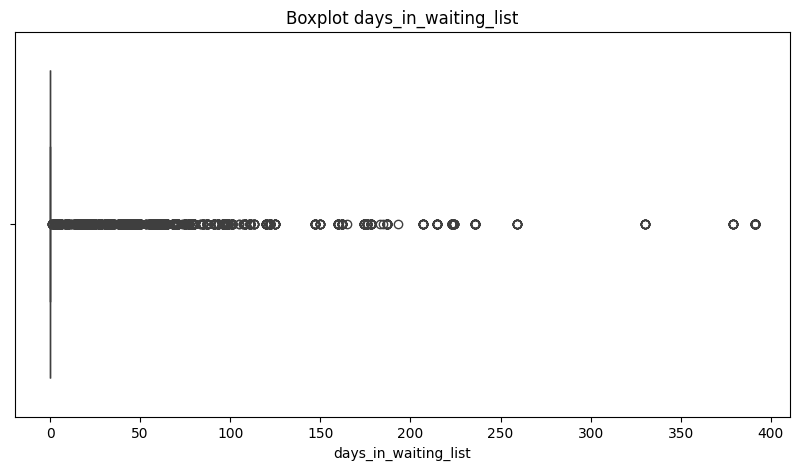

In [224]:
# box plot kolom days_in_waiting_list 
plt.figure(figsize=(10,5))
sns.boxplot(x="days_in_waiting_list", data=df)
plt.title("Boxplot days_in_waiting_list")
plt.show()

Berdasarkan data terbaru dari [SiteMinder](https://www.siteminder.com/r/booking-lead-time/), waktu tunggu (*waiting list)* dalam konteks pemesanan hotel yang dikenal sebagai *booking lead time* bervariasi tergantung pada negara dan musim. Namun, secara umum, durasi pemesanan di muka berkisar antara 20 hingga 60 hari sebelum tanggal check-in. Oleh karena itu, pada dataset ini kita akan melakukan limitasi pada kolom `days_in_waiting_list`. <br>
limitasi waiting list day hingga 60 hari diterapkan karena biasanya, pemesanan hotel tidak dilakukan lebih dari 60 hari sebelum tanggal check-in. Pemesanan yang dilakukan jauh sebelumnya jarang terjadi dan tidak mencerminkan kebiasaan mayoritas konsumen. Dengan membatasi data hingga 60 hari, kami bisa fokus pada pola pemesanan yang lebih umum dan relevan, serta menghindari distorsi dari data pemesanan yang jarang terjadi.

In [225]:
print(f"Jumlah waiting list reservasi lebih dari 60 hari: {df[df["days_in_waiting_list"]>60].shape[0]}")
print(f"Jumlah nilai duplikat waiting list reservasi lebih dari 60 hari: {df[df["days_in_waiting_list"]>60].duplicated().sum()}, Percentage: {df[df["days_in_waiting_list"]>60].duplicated().sum()/df[df["days_in_waiting_list"]>60].shape[0]:.2%}")

Jumlah waiting list reservasi lebih dari 60 hari: 1118
Jumlah nilai duplikat waiting list reservasi lebih dari 60 hari: 884, Percentage: 79.07%


Jumlah waiting list reservasi yang lebih dari 60 hari adalah 1118, dengan 884 di antaranya merupakan nilai duplikat, yang berarti sekitar 79,07% dari data tersebut adalah duplikat. Hal ini menunjukkan bahwa sebagian besar pemesanan yang berada di luar rentang 60 hari tidak hanya jarang terjadi, tetapi juga cenderung terulang dalam data, sehingga tidak memberikan informasi baru yang signifikan. Oleh karena itu, untuk menjaga kualitas dan relevansi data, nilai-nilai ini akan dihapus, karena mereka tidak mencerminkan pola pemesanan yang umum dan justru bisa menyebabkan distorsi dalam analisis.

In [226]:
df = df[df["days_in_waiting_list"]<=60]

## country

In [227]:
# Cek jika ada kode negara yang panjang karakternya lebih dari 3
[val for val in df["country"].unique() if len(str(val))>3 ]

[]

In [228]:
df[df["country"].isna()]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
814,NaN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1166,NaN,Direct,2,0,No Deposit,0,Transient,E,0,3,1
1304,NaN,Direct,0,1,No Deposit,0,Transient,D,0,1,0
1661,NaN,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
2182,NaN,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
82466,NaN,Offline TA/TO,0,0,No Deposit,0,Transient,A,0,0,0
83084,NaN,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
83106,NaN,Direct,0,0,No Deposit,0,Transient,A,0,2,0
83353,NaN,Direct,0,0,No Deposit,0,Transient,A,0,0,0


In [229]:
print("Modus country berdasarkan market segment :")
df.groupby(['market_segment'])['country'].describe()["top"]

Modus country berdasarkan market segment :


market_segment
Aviation         PRT
Complementary    PRT
Corporate        PRT
Direct           PRT
Groups           PRT
Offline TA/TO    PRT
Online TA        PRT
Name: top, dtype: object

In [230]:
print("Modus country berdasarkan customer type :")
df.groupby(['customer_type'])['country'].describe()["top"]

Modus country berdasarkan customer type :


customer_type
Contract           PRT
Group              PRT
Transient          PRT
Transient-Party    PRT
Name: top, dtype: object

Nilai kosong pada kolom `country` sebanyak 351 baris (0.42%) tergolong sangat kecil dan tidak signifikan secara statistik. Hasil analisis menunjukkan bahwa modus `country` untuk seluruh data, serta dalam setiap kategori `market_segment` dan `customer_type`, adalah `'PRT'` (Portugal). Ini menandakan dominasi konsisten tamu lokal dalam seluruh segmen pelanggan. Oleh karena itu, imputasi nilai kosong dengan `'PRT'` adalah pilihan yang tepat karena merepresentasikan pola dominan secara menyeluruh, meminimalkan potensi bias, dan menjaga kesederhanaan tanpa mengorbankan validitas data.

In [231]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

## duplicate

In [232]:
print("Jumlah data :", len(df))
print(f"Jumlah duplikat : {df.duplicated().sum()} ({df.duplicated().sum()/len(df):.2%})" )

Jumlah data : 82454
Jumlah duplikat : 72592 (88.04%)


In [233]:
print(f"Data sebelum drop: {len(df)}")
print(f"Data setelah drop: {len(df.drop_duplicates())}")

Data sebelum drop: 82454
Data setelah drop: 9862


Menghapus baris yang benar-benar identik adalah langkah yang aman dan disarankan karena duplikat penuh tidak menambah informasi, justru meningkatkan risiko overfitting, membuang resource komputasi, dan dapat mengacaukan distribusi statistik dalam analisis maupun pelatihan model.

In [234]:
df.drop_duplicates(inplace=True)

​Menghapus data duplikat dalam dataset machine learning dapat diterima dan sering kali diperlukan untuk meningkatkan kualitas model. Duplikat dapat menyebabkan model "mempelajari" informasi yang sama berulang kali, yang berisiko menyebabkan overfitting—model terlalu menyesuaikan diri dengan data pelatihan dan gagal menggeneralisasi dengan baik ke data baru. Sebagai contoh, penelitian oleh [Lee et al. (2021)](https://arxiv.org/abs/2107.06499) menunjukkan bahwa menghapus duplikat dalam dataset pelatihan dapat mengurangi frekuensi model menyalin teks secara verbatim, meningkatkan akurasi, dan mempercepat konvergensi pelatihan.

In [235]:
cek_data(df)

,Column,Dtype,Null,Unique Count,Unique Sample
0,country,object,0 (0.00%),162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,object,0 (0.00%),7,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,int64,0 (0.00%),15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,int64,0 (0.00%),19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,object,0 (0.00%),3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,0 (0.00%),56,"[0, 3, 39, 46, 4, 31, 34, 57, 50, 17, 32, 43, ..."
6,customer_type,object,0 (0.00%),4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,0 (0.00%),10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,0 (0.00%),5,"[0, 1, 2, 3, 8]"
9,total_of_special_requests,int64,0 (0.00%),6,"[0, 2, 1, 3, 4, 5]"


In [236]:
df.to_csv("../data/clean/hotel_booking_demand_clean.csv", index=False)

# Data Exploration

## Numeric Variable

In [237]:
cek_num = cek_data(df)
cek_num = cek_num[cek_num["Dtype"]!="object"]
cek_num["Min"] = [val for val in df.describe().T["min"].values]
cek_num["25%"] = [val for val in df.describe().T["25%"].values]
cek_num["50%"] = [val for val in df.describe().T["50%"].values]
cek_num["75%"] = [val for val in df.describe().T["75%"].values]
cek_num["Max"] = [val for val in df.describe().T["max"].values]

cek_num

,Column,Dtype,Null,Unique Count,Unique Sample,Min,25%,50%,75%,Max
2,previous_cancellations,int64,0 (0.00%),15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,...",0.0,0.0,0.0,0.0,26.0
3,booking_changes,int64,0 (0.00%),19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,...",0.0,0.0,0.0,1.0,21.0
5,days_in_waiting_list,int64,0 (0.00%),56,"[0, 3, 39, 46, 4, 31, 34, 57, 50, 17, 32, 43, ...",0.0,0.0,0.0,0.0,60.0
8,required_car_parking_spaces,int64,0 (0.00%),5,"[0, 1, 2, 3, 8]",0.0,0.0,0.0,0.0,8.0
9,total_of_special_requests,int64,0 (0.00%),6,"[0, 2, 1, 3, 4, 5]",0.0,0.0,1.0,2.0,5.0
10,is_canceled,int64,0 (0.00%),2,"[0, 1]",0.0,0.0,0.0,0.0,1.0


In [238]:
numeric_var = df.select_dtypes(include="number")

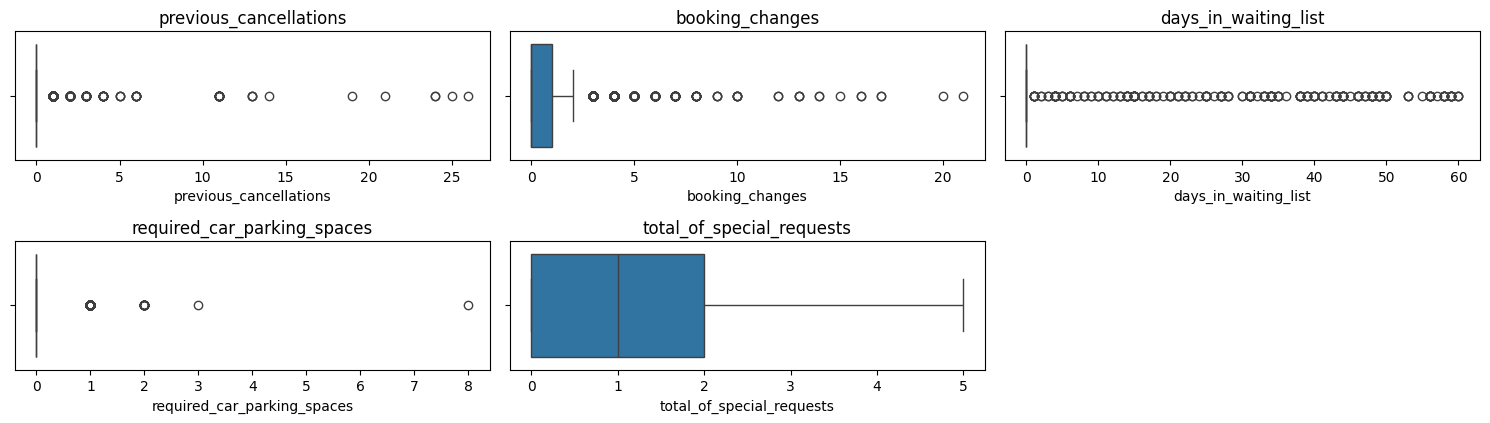

In [239]:
x_num = list(numeric_var.columns.drop("is_canceled"))


plt.figure(figsize=(15,6))

for i, feat in enumerate(x_num,1):

    plt.subplot(3,3,i)
    sns.boxplot(data=df, x=feat)
    plt.title(feat)
    plt.tight_layout()


Hampir semua variabel menunjukkan kehadiran outlier, terutama pada `days_in_waiting_list` yang memiliki sebaran data luas hingga mendekati 60 hari, dan `booking_changes` yang mencapai lebih dari 20 kali perubahan. Sebagian besar nilai dari `previous_cancellations` dan `required_car_parking_spaces` terkonsentrasi di angka nol, menunjukkan bahwa sebagian besar tamu tidak pernah membatalkan sebelumnya dan tidak membutuhkan tempat parkir. Sementara itu, `total_of_special_requests` memiliki distribusi lebih merata hingga nilai maksimum 5, menunjukkan adanya variasi dalam permintaan khusus dari tamu.

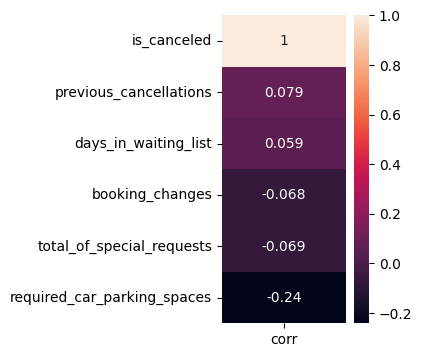

In [240]:
# Cek Korelasi numeric feature terhadap target
corr_matrix = numeric_var.corrwith(df['is_canceled']).sort_values(ascending=False)
corr_matrix = corr_matrix.to_frame('corr')

plt.figure(figsize=(2, 4))
sns.heatmap(corr_matrix, annot=True)
plt.show()

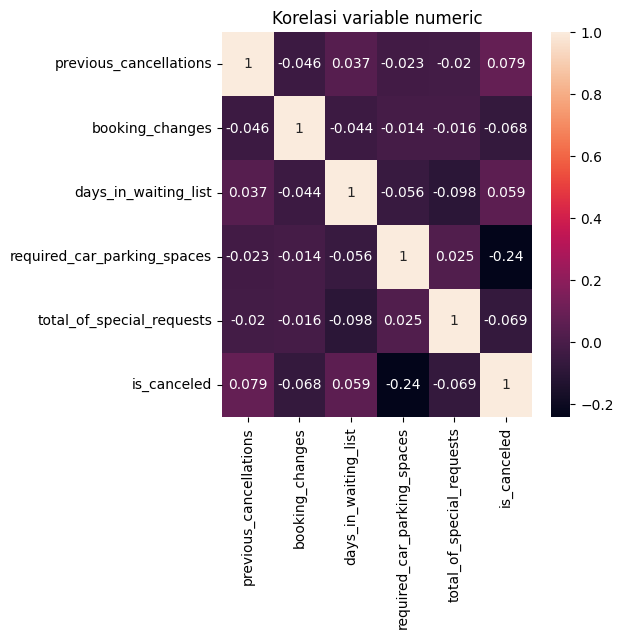

In [241]:
feature_corr = numeric_var.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(numeric_var.corr(), annot=True)
plt.title("Korelasi variable numeric")
plt.show()

nilai korelasi absolut antara fitur numerik dan target `is_canceled` semuanya tergolong lemah, dengan nilai tertinggi adalah `required_car_parking_spaces` sebesar -0.24, yang menunjukkan bahwa tamu yang membutuhkan parkir cenderung tidak membatalkan reservasi. Meskipun nilainya di bawah ambang korelasi lemah (0.3). 

https://www.datacamp.com/tutorial/tutorial-datails-on-correlation

## Categorical Variable

In [242]:
# Cek Cardinality (Cek banyak katerori setiap variabel kategorik)
# Banyak kategori -> High Cardinality (model susah dalam mempelajari pola)

categorical_var = df.select_dtypes(include='object')
categorical_var.nunique().sort_values(ascending=False)

country               162
reserved_room_type     10
market_segment          7
customer_type           4
deposit_type            3
dtype: int64

Variabel country memiliki kardinalitas tertinggi dengan 162 kategori unik, yang menunjukkan adanya variasi yang sangat besar dalam data berdasarkan negara. Sementara itu, reserved_room_type memiliki kardinalitas 10, mengindikasikan 10 jenis kamar yang berbeda. Variabel market_segment memiliki 7 kategori, mencerminkan tujuh segmen pasar yang berbeda, dan customer_type memiliki 4 kategori, yang menunjukkan jenis pelanggan yang berbeda. Terakhir, deposit_type memiliki kardinalitas terendah dengan hanya 3 kategori, menunjukkan sedikit variasi dalam jenis deposit yang diterapkan. Secara keseluruhan, variabel country memiliki kardinalitas yang paling tinggi, sementara deposit_type memiliki kardinalitas yang paling rendah.

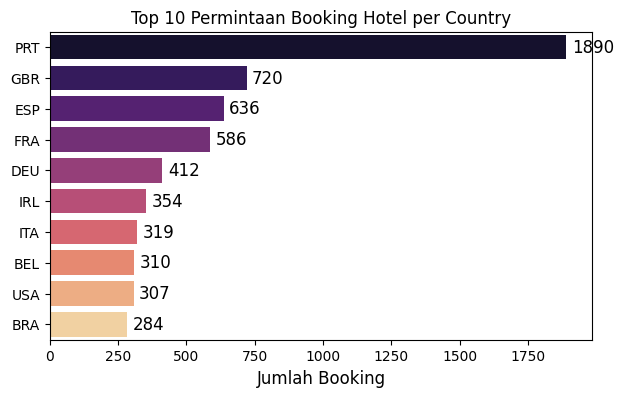

In [243]:
top_n = 10
top_country = df["country"].value_counts().head(top_n)

plt.figure(figsize=(7, 4))
ax = sns.barplot(x=top_country.values, y=top_country.index, hue=top_country.index, palette="magma", legend=False)

# Menambahkan label nilai di atas setiap batang
for index, value in enumerate(top_country.values):
    plt.text(value + 20 , index, str(value), color="black", va="center", fontsize=12)

# Menambahkan judul dan label
plt.title(f"Top {top_n} Permintaan Booking Hotel per Country", fontsize=12)
plt.xlabel("Jumlah Booking", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

Grafik ini menunjukkan 10 negara dengan jumlah permintaan booking hotel terbanyak. Portugal (PRT) memimpin dengan jumlah booking mencapai 1.890, jauh di atas negara-negara lain. Diikuti oleh Inggris (GBR) dengan 720 booking, Spanyol (ESP) dengan 636, dan Prancis (FRA) dengan 586. Negara-negara lain yang termasuk dalam daftar ini adalah Jerman (DEU), Irlandia (IRL), Italia (ITA), Belgia (BEL), Amerika Serikat (USA), dan Brasil (BRA), dengan jumlah booking masing-masing berkisar antara 284 hingga 412. Grafik ini menunjukkan bahwa Portugal mendominasi permintaan booking hotel, jauh melampaui negara-negara lainnya.

In [244]:
country_summary = df.groupby('country')['is_canceled'].agg(
    jumlah_order='count',  # Menghitung jumlah order per negara
    jumlah_canceled='sum',  # Menghitung jumlah yang dibatalkan (jumlah 1 pada is_canceled)
    jumlah_tidak_canceled=lambda x: (x == 0).sum(),  # Menghitung jumlah yang tidak dibatalkan (jumlah 0 pada is_canceled)
)

country_summary['persentase_cancel'] = (country_summary['jumlah_canceled'] / country_summary['jumlah_order']) * 100
country_summary.sort_values(by='persentase_cancel', ascending=False, inplace=True)

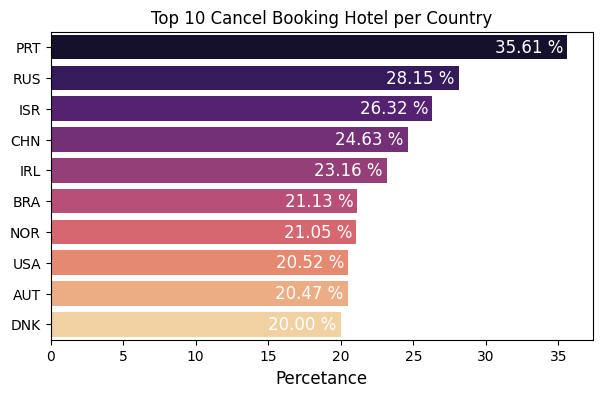

In [245]:
top_n = 10
top_cancel_country = country_summary[country_summary["jumlah_order"] > 100].head(top_n)

plt.figure(figsize=(7, 4))
ax = sns.barplot(x=top_cancel_country["persentase_cancel"], y=top_cancel_country.index, hue=top_cancel_country.index, palette="magma", legend=False)

# Menambahkan label nilai di atas setiap batang
for index, value in enumerate(top_cancel_country["persentase_cancel"]):
    plt.text(value-5  , index, f"{value:.2f} %", color="w", va="center", fontsize=12)

# Menambahkan judul dan label
plt.title(f"Top {top_n} Cancel Booking Hotel per Country", fontsize=12)
plt.xlabel("Percetance", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

Portugal (PRT) menempati urutan pertama dengan persentase pembatalan sebesar 35,61%, disusul oleh Rusia (RUS) dengan 28,15%, Israel (ISR) 26,32%, dan Cina (CHN) 24,63%. Negara lain dalam daftar ini termasuk Irlandia (IRL), Brasil (BRA), Norwegia (NOR), Amerika Serikat (USA), Austria (AUT), dan Denmark (DNK) dengan persentase pembatalan antara 20,00% hingga 23,16%. Jika dibandingkan dengan grafik jumlah booking sebelumnya, Portugal tidak hanya mencatat jumlah pemesanan tertinggi tetapi juga tingkat pembatalan tertinggi, yang mengindikasikan bahwa meskipun permintaan tinggi, risiko pembatalan dari negara ini juga sangat besar.

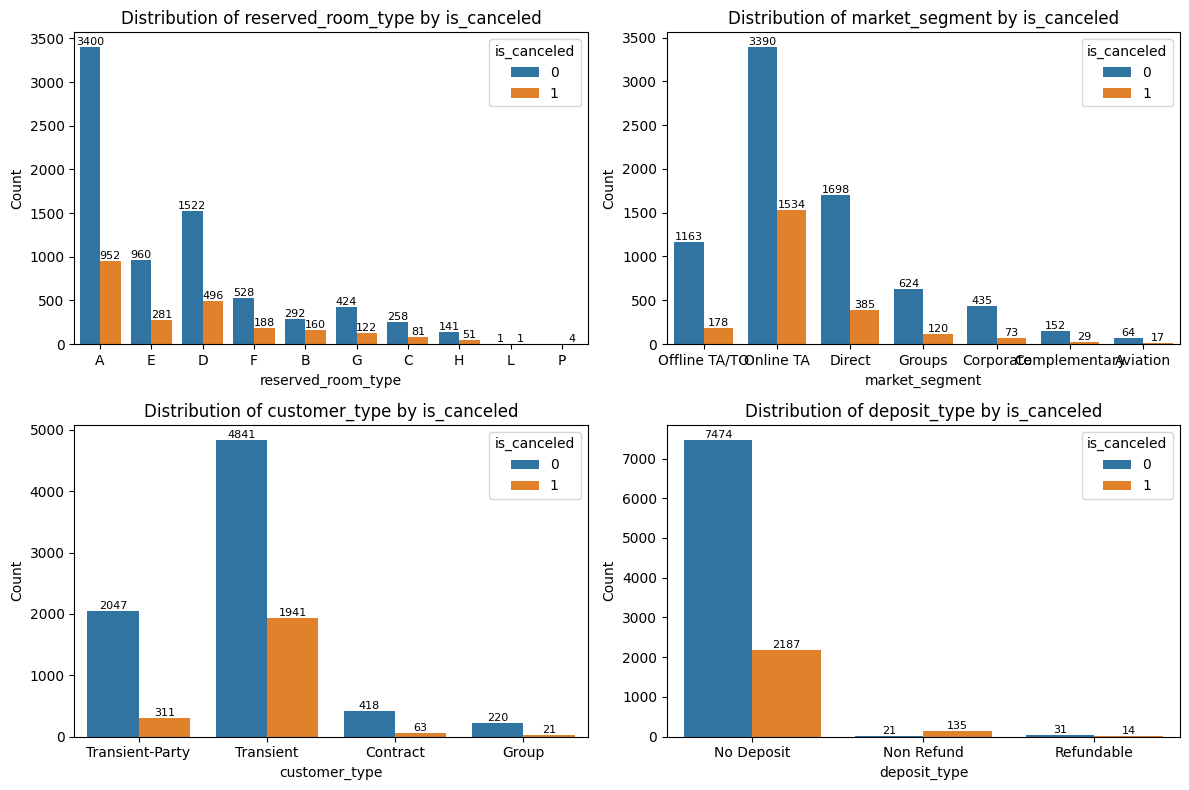

In [246]:
cat_ = ['reserved_room_type', 'market_segment', 'customer_type', 'deposit_type']

# Tentukan layout grid
n_cols = 2
n_rows = (len(cat_) + n_cols - 1) // n_cols # sama dengan roundup

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_):
    ax = axes[i]
    sns.countplot(x=col, hue='is_canceled', data=df, ax=ax)
    ax.set_title(f'Distribution of {col} by is_canceled')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Tambahkan jumlah di atas bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=8)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.savefig('distribution_by_canceled.png')
plt.show()

Visualisasi ini menunjukkan bahwa **tipe kamar "A"** memiliki jumlah pemesanan tertinggi dengan **3.400 tidak dibatalkan** dan **952 dibatalkan**, diikuti oleh tipe "E" (960 tidak dibatalkan dan 281 dibatalkan) serta "D" (1.522 tidak dibatalkan dan 496 dibatalkan). Pada segmen pasar, **"Online TA" menyumbang 3.390 pemesanan yang tidak dibatalkan dan 1.534 yang dibatalkan**, menjadikannya segmen dengan jumlah pembatalan tertinggi. Dari sisi tipe pelanggan, **"Transient" mendominasi dengan 4.841 pemesanan tidak dibatalkan dan 1.941 dibatalkan**, jauh lebih tinggi dibandingkan tipe pelanggan lainnya. Untuk tipe deposit, **"No Deposit" mencatat 7.474 pemesanan tidak dibatalkan dan 2.187 dibatalkan**, sementara tipe "Non Refund" dan "Refundable" menunjukkan jumlah pembatalan yang sangat kecil. Pola ini menegaskan bahwa pembatalan paling sering terjadi pada pemesanan tanpa deposit, oleh pelanggan bertipe "Transient", dan melalui kanal "Online TA".


## Target Distribution

In [247]:
target_count = df["is_canceled"].value_counts()

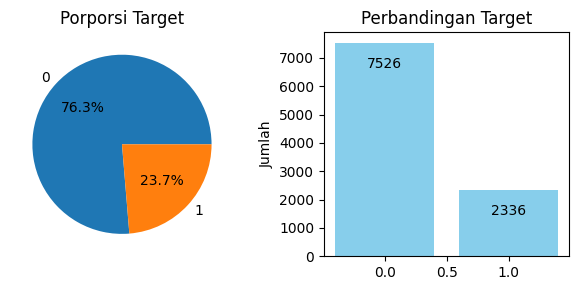

In [248]:
# Membuat figure dan axis
fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # 1 baris, 2 kolom

# Pie chart
axs[0].pie(x=target_count.values, labels=target_count.index, autopct='%1.1f%%')
axs[0].set_title("Porporsi Target")

# Bar chart
axs[1].bar(target_count.index, target_count.values, color='skyblue')
axs[1].set_title("Perbandingan Target")
axs[1].set_ylabel("Jumlah")

# Menambahkan label pada bar chart
for i, v in enumerate(target_count.values):
    axs[1].text(i, v - 1000, str(v), ha='center', va='bottom')


# Menampilkan plot
plt.tight_layout()
plt.show()

Grafik ini menunjukkan distribusi target (`is_canceled`), yang memiliki dua kelas: 0 (Tidak Dibatalkan) dan 1 (Dibatalkan). Pada grafik pie chart (kiri), terlihat bahwa 76% dari data tidak mengalami pembatalan (0), sedangkan 23% mengalami pembatalan (1). Sementara itu, pada grafik bar chart (kanan), jumlah totalnya adalah 7.526 untuk yang tidak dibatalkan (kelas 0) dan 2.336 untuk yang dibatalkan (kelas 1). Ini menunjukkan bahwa pembatalan relatif lebih sedikit dibandingkan dengan jumlah yang tidak dibatalkan, yang berarti pada dataset ini tidak balance.

# Data Preparation

In [249]:
cek_obj = cek_data(df)
cek_obj = cek_obj[cek_obj["Dtype"]=="object"]
cek_obj.reset_index(drop=True)

,Column,Dtype,Null,Unique Count,Unique Sample
0,country,object,0 (0.00%),162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,object,0 (0.00%),7,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,deposit_type,object,0 (0.00%),3,"[No Deposit, Non Refund, Refundable]"
3,customer_type,object,0 (0.00%),4,"[Transient-Party, Transient, Contract, Group]"
4,reserved_room_type,object,0 (0.00%),10,"[A, E, D, F, B, G, C, H, L, P]"


Analisis Encoding yang cocok berdasarkan jenis data :
1. Fitur `country` memiliki 162 kategori unik dan bersifat non-ordinal, sehingga tidak cocok untuk One Hot Encoding karena akan menghasilkan terlalu banyak fitur baru. Oleh karena itu, **Binary Encoding** merupakan pilihan terbaik untuk mengurangi dimensi sambil tetap mempertahankan informasi kategorikal.
1. Fitur `market_segment` memiliki 7 kategori unik dan tidak memiliki urutan atau skala tertentu. Karena jumlah kategorinya relatif sedikit, maka **One Hot Encoding** adalah metode yang cocok untuk representasi fitur ini.
1. Fitur `deposit_type` hanya memiliki 3 kategori dan tidak bersifat ordinal. Oleh karena itu, **One Hot Encoding** sangat sesuai karena tidak akan menghasilkan banyak fitur tambahan.
1. Fitur `customer_type` memiliki 4 kategori yang tidak memiliki urutan alami, sehingga **One Hot Encoding** dapat digunakan untuk memberikan representasi yang jelas terhadap setiap kategori tanpa asumsi skala.
1. Fitur `reserved_room_type` memiliki 10 kategori unik, huruf A, B, C, dst. adalah kode untuk tipe kamar, kita tidak tahu apakah kamar "A" lebih baik atau lebih buruk dari kamar "B". Huruf-huruf tersebut hanyalah label yang digunakan sebagai penanda, bukan representasi dari urutan kualitas atau harga. Untuk menjaga interpretabilitas dan performa model, **One Hot Encoding** tetap layak digunakan di sini.

In [250]:
cek_num = cek_data(df)
cek_num = cek_num[cek_num["Dtype"]!="object"]
cek_num["Min"] = [val for val in df.describe().T["min"].values]
cek_num["Med"] = [val for val in df.describe().T["50%"].values]
cek_num["Max"] = [val for val in df.describe().T["max"].values]

cek_num.drop(index=10).reset_index(drop=True)

,Column,Dtype,Null,Unique Count,Unique Sample,Min,Med,Max
0,previous_cancellations,int64,0 (0.00%),15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,...",0.0,0.0,26.0
1,booking_changes,int64,0 (0.00%),19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,...",0.0,0.0,21.0
2,days_in_waiting_list,int64,0 (0.00%),56,"[0, 3, 39, 46, 4, 31, 34, 57, 50, 17, 32, 43, ...",0.0,0.0,60.0
3,required_car_parking_spaces,int64,0 (0.00%),5,"[0, 1, 2, 3, 8]",0.0,0.0,8.0
4,total_of_special_requests,int64,0 (0.00%),6,"[0, 2, 1, 3, 4, 5]",0.0,1.0,5.0


Penggunaan **RobustScaler** cocok untuk semua fitur numerik karena dapat menangani distribusi skewed dan outlier dengan baik, terutama pada fitur seperti `previous_cancellations` dan `days_in_waiting_list`. Meskipun beberapa fitur memiliki rentang kecil, penggunaan **RobustScaler** tetap aman dan memberikan konsistensi dalam preprocessing tanpa mengganggu struktur data.

In [251]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment','deposit_type', 'customer_type', 'reserved_room_type']),
    ('binary', BinaryEncoder(), ['country']),
    ("robust",RobustScaler(),  ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 
                                'required_car_parking_spaces','total_of_special_requests'])
], remainder='passthrough', verbose_feature_names_out=False)

In [252]:
x = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [253]:
x_train,x_test,y_train,y_test=train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [254]:
preview = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
preview.head()

,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,...,country_3,country_4,country_5,country_6,country_7,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,-0.5
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.5
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Model & Evaluation

In [255]:
rs = 42

# Daftar model dan namanya
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=rs),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=rs),
    'Random Forest': RandomForestClassifier(random_state=rs),
    'XGBoost': XGBClassifier(random_state=rs),
    'LightGBM': lgb.LGBMClassifier(random_state=rs)
}


## Model Benchmarking StratifiedKFold (imbalance)

In [256]:
def kfold_eval(models, model_pipeline, x_train, y_train, n_split=5):
    benchmark_result = {
        "model_name": [],
        "model_object": [],
        "mean_accuracy_train": [],
        "std_accuracy_train": [],
        "mean_accuracy_test": [],
        "std_accuracy_test": [],
        "mean_recall_train": [],
        "std_recall_train": [],
        "mean_recall_test": [],
        "std_recall_test": []}

    for name, model in models.items():  
        model_pipeline.set_params(Model=model)
        result = cross_validate(estimator=model_pipeline,
                                X=x_train, y=y_train,
                                scoring=["accuracy", "recall"],
                                cv = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=rs),
                                return_train_score=True,
                                return_estimator=True)
        
        benchmark_result["model_name"].append(name)
        benchmark_result["model_object"].append(model)
        
        benchmark_result["mean_accuracy_train"].append(np.mean(result["train_accuracy"]))
        benchmark_result["std_accuracy_train"].append(np.std(result["train_accuracy"]))
        benchmark_result["mean_accuracy_test"].append(np.mean(result["test_accuracy"]))
        benchmark_result["std_accuracy_test"].append(np.std(result["test_accuracy"]))
        
        benchmark_result["mean_recall_train"].append(np.mean(result["train_recall"]))
        benchmark_result["std_recall_train"].append(np.std(result["train_recall"]))
        benchmark_result["mean_recall_test"].append(np.mean(result["test_recall"]))
        benchmark_result["std_recall_test"].append(np.std(result["test_recall"]))

    benchmark_result["accuracy_gap"] = np.array(benchmark_result["mean_accuracy_train"]) - np.array(benchmark_result["mean_accuracy_test"])
    benchmark_result["recall_gap"] = np.array(benchmark_result["mean_recall_train"]) - np.array(benchmark_result["mean_recall_test"])
    benchmark_result_df = pd.DataFrame(benchmark_result)
        
    return benchmark_result_df

In [ ]:
model_pipeline_1 = Pipeline(steps=[
    ("Feature Engineering", transformer),
    ("Model", None) # Model akan terisi otomatis dari function
])

results = kfold_eval(models, model_pipeline_1, x_train, y_train, n_split=5)

In [258]:
results.sort_values(by=["mean_recall_test", "recall_gap"], ascending=[False, True])

,model_name,model_object,mean_accuracy_train,std_accuracy_train,mean_accuracy_test,std_accuracy_test,mean_recall_train,std_recall_train,mean_recall_test,std_recall_test,accuracy_gap,recall_gap
4,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.833629,0.001614,0.772341,0.003299,0.465889,0.007435,0.337598,0.024034,0.061288,0.128291
1,KNN,KNeighborsClassifier(),0.827006,0.002405,0.731653,0.007076,0.507090,0.008221,0.314631,0.027296,0.095353,0.192459
5,LightGBM,LGBMClassifier(random_state=42),0.822348,0.002553,0.780961,0.002479,0.398607,0.018914,0.308182,0.018561,0.041387,0.090425
3,Random Forest,RandomForestClassifier(random_state=42),0.912663,0.001559,0.697047,0.005758,0.774746,0.013350,0.283579,0.025134,0.215616,0.491168
2,Decision Tree,DecisionTreeClassifier(random_state=42),0.912663,0.001559,0.669287,0.003821,0.631353,0.006609,0.266449,0.031317,0.243376,0.364904
0,Logistic Regression,"LogisticRegression(max_iter=1000, random_state...",0.778552,0.000620,0.774750,0.004420,0.250135,0.006494,0.246123,0.007028,0.003802,0.004012


`XGBoost`  menunjukkan performa yang paling seimbang di antara semua model. Recall-nya (0.337598) model dan gap akurasi (0.061288) dan gap recall (0.128291) relatif kecil, yang menunjukkan bahwa LightGBM tidak terlalu overfitting dan memiliki kemampuan generalisasi yang baik. Kombinasi ini menjadikan XGBoost sebagai pilihan yang paling seimbang antara akurasi, recall, dan kestabilan.

## Model Benchmarking : Test Data (imbalance)

In [259]:
# Inisialisasi hasil
results_test = {
    'model': [],
    'accuracy': [],
    'recall': [],
    'f1_score': []
}

# Benchmarking dengan test data
for name, model in models.items():
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)

    print(name, '\n', classification_report(y_test, y_pred))
    
    results_test['model'].append(name)
    results_test['accuracy'].append(accuracy_score(y_test, y_pred))
    results_test['recall'].append(recall_score(y_test, y_pred))
    results_test['f1_score'].append(f1_score(y_test, y_pred))

# Tampilkan hasil
df_results_test = pd.DataFrame(results_test).set_index('model').sort_values(by='f1_score', ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      1506
           1       0.59      0.25      0.35       467

    accuracy                           0.78      1973
   macro avg       0.70      0.60      0.61      1973
weighted avg       0.75      0.78      0.75      1973

KNN 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      1506
           1       0.39      0.30      0.34       467

    accuracy                           0.72      1973
   macro avg       0.60      0.58      0.58      1973
weighted avg       0.70      0.72      0.71      1973

Decision Tree 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1506
           1       0.26      0.24      0.25       467

    accuracy                           0.66      1973
   macro avg       0.52      0.52      0.52      1973
weighted avg       0.65      0

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [260]:
df_results_test.sort_values(by="recall", ascending=False)

,accuracy,recall,f1_score
model,,,
XGBoost,0.776483,0.336188,0.415894
LightGBM,0.777496,0.306210,0.394483
KNN,0.724278,0.304069,0.342995
Random Forest,0.687785,0.256959,0.280374
Logistic Regression,0.781044,0.252677,0.353293
Decision Tree,0.659909,0.244111,0.253615


Berdasarkan hasil evaluasi pada data uji, `XGBoost` tetap menjadi pilihan terbaik karena:
* Recall tertinggi (0.336188), menunjukkan kemampuan terbaik dalam menangkap kelas positif — sangat penting jika false negative perlu ditekan.
* Akurasi tertinggi (0.77), lebih unggul dari semua model laint.
* F1-score tertinggi (0.415), menunjukkan keseimbangan optimal antara presisi dan recall.

Meskipun LightGBM memiliki acurracy yang sama, XGBoost mengungguli di recall dan f1-score, menjadikannya model yang lebih andal dan seimbang secara keseluruhan untuk prediksi pada data uji.

## Model Benchmarking (Balancing)

In [261]:
# under sampling
pipeline_under = imb_pipeline(steps=[
    ("FeatureEngineering", transformer),
    ("Resample", RandomUnderSampler(random_state=rs)),
    ("Model", None)
])

# over sampling
pipeline_over = imb_pipeline(steps=[
    ("FeatureEngineering", transformer),
    ("Resample", RandomOverSampler(random_state=rs)),
    ("Model", None)
])

# Over sampling dengan SMOTE
pipeline_smote = imb_pipeline(steps=[
    ("FeatureEngineering", transformer),
    ("Resample", SMOTE(random_state=rs)),
    ("Model", None)
])


### Undersampling

#### Train with StratifiedKFold (Undersampling)

In [262]:
# preview under sampling
x_under, y_under = imb_pipeline(steps=[
                    ("FeatureEngineering", transformer),
                    ("Resample", RandomUnderSampler(random_state=rs))]).fit_resample(x_train, y_train)

print("proporsi target sebelum undersampling:")
display(y_train.value_counts())

print("proporsi target setelah undersampling:")
display(y_under.value_counts())


proporsi target sebelum undersampling:


is_canceled
0    6020
1    1869
Name: count, dtype: int64

proporsi target setelah undersampling:


is_canceled
0    1869
1    1869
Name: count, dtype: int64

In [ ]:
df_train_under = kfold_eval(models, pipeline_under, x_train, y_train, n_split=5)

In [264]:
df_train_under.sort_values(by=["mean_recall_test", "recall_gap"], ascending=[False, True])

,model_name,model_object,mean_accuracy_train,std_accuracy_train,mean_accuracy_test,std_accuracy_test,mean_recall_train,std_recall_train,mean_recall_test,std_recall_test,accuracy_gap,recall_gap
5,LightGBM,LGBMClassifier(random_state=42),0.743282,0.005040,0.704273,0.004209,0.914794,0.004536,0.826645,0.026869,0.039009,0.088149
0,Logistic Regression,"LogisticRegression(max_iter=1000, random_state...",0.698568,0.002030,0.698061,0.004244,0.813268,0.007849,0.810056,0.010062,0.000506,0.003212
4,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.755292,0.005498,0.699836,0.004730,0.924290,0.006651,0.803110,0.012628,0.055456,0.121180
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.780897,0.003820,0.665738,0.006516,0.962814,0.002953,0.749070,0.031102,0.115159,0.213744
1,KNN,KNeighborsClassifier(),0.727754,0.007923,0.670174,0.006133,0.744114,0.018421,0.625471,0.017436,0.057580,0.118643
2,Decision Tree,DecisionTreeClassifier(random_state=42),0.792591,0.003450,0.654836,0.007875,0.884162,0.003395,0.599259,0.010317,0.137754,0.284903


`LightGBM` terlihat hasil yang baik karena menunjukkan keseimbangan optimal antara akurasi dan recall pada data uji, dengan nilai akurasi sebesar 70% dan recall tertinggi sebesar 82%. Selain itu, perbedaan performa antara data latih dan data uji (gap) relatif kecil, yaitu hanya 0.04 untuk akurasi dan 0.09 untuk recall, yang menunjukkan bahwa model ini tidak mengalami overfitting secara signifikan.

#### Test Data (Undersampling)

In [265]:
def test_with_sampling(models, transformer, sampler, x_train, y_train, x_test, y_test):
    results = {
        'model': [],
        'Accuracy Test': [],
        'Recall Test': [],
        'Precision Test': [],
        'F1 Score Test': []
    }

    for name, model in models.items():
        pipeline = imb_pipeline([
            ('preprocess', transformer),
            ('resample', sampler),
            ('model', model)
        ])

        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)

        print(f"\n{name}:\n{classification_report(y_test, y_pred)}")

        results['model'].append(name)
        results['Accuracy Test'].append(accuracy_score(y_test, y_pred))
        results['Recall Test'].append(recall_score(y_test, y_pred))
        results["Precision Test"].append(precision_score(y_test, y_pred))
        results['F1 Score Test'].append(f1_score(y_test, y_pred))

    return pd.DataFrame(results).set_index('model').sort_values(by='Recall Test', ascending=False)

In [266]:
df_test_under = test_with_sampling(
    models=models,
    transformer=transformer,
    sampler=RandomUnderSampler(random_state=rs), 
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

df_test_under


Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1506
           1       0.43      0.79      0.56       467

    accuracy                           0.71      1973
   macro avg       0.67      0.74      0.67      1973
weighted avg       0.80      0.71      0.73      1973


KNN:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1506
           1       0.39      0.59      0.47       467

    accuracy                           0.68      1973
   macro avg       0.62      0.65      0.62      1973
weighted avg       0.74      0.68      0.70      1973


Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.68      0.74      1506
           1       0.34      0.55      0.42       467

    accuracy                           0.65      1973
   macro avg       0.59      0.61      0.58      1973
weighted avg       0.71      0

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Accuracy Test,Recall Test,Precision Test,F1 Score Test
model,,,,
LightGBM,0.706031,0.841542,0.437152,0.575403
XGBoost,0.712114,0.832976,0.442548,0.578009
Logistic Regression,0.707045,0.792291,0.434783,0.561457
Random Forest,0.652813,0.713062,0.376697,0.492968
KNN,0.683224,0.593148,0.389045,0.469890
Decision Tree,0.646224,0.550321,0.344966,0.424092


In [267]:
df_under_result = df_train_under[["model_name","mean_recall_test","std_recall_test"]].rename(columns={"mean_recall_test":"Recall CV",
"std_recall_test":"Std Recall CV"}).set_index("model_name").join(df_test_under["Recall Test"])
df_under_result["Recall Gap"] = df_under_result["Recall CV"] - df_under_result["Recall Test"]
df_under_result.sort_values(by="Recall Test", ascending=False)

,Recall CV,Std Recall CV,Recall Test,Recall Gap
model_name,,,,
LightGBM,0.826645,0.026869,0.841542,-0.014897
XGBoost,0.803110,0.012628,0.832976,-0.029867
Logistic Regression,0.810056,0.010062,0.792291,0.017765
Random Forest,0.749070,0.031102,0.713062,0.036008
KNN,0.625471,0.017436,0.593148,0.032323
Decision Tree,0.599259,0.010317,0.550321,0.048938


Berdasarkan hasil evaluasi setelah **Undersampling**, `LightGBM` merupakan model terbaik. Model ini mencatat Recall Test tertinggi sebesar 0.841542, yang menunjukkan performa paling baik dalam mengenali kelas minoritas di data yang belum pernah dilihat. Nilai Recall CV sebesar 0.826645 dengan standar deviasi rendah (0.026869) menunjukkan bahwa model ini konsisten selama proses validasi. Recall Gap sebesar -0.014897
 menandakan bahwa performanya di test set sedikit lebih baik daripada rata-rata cross-validation, yang merupakan indikasi generalisasi yang sangat baik. Kombinasi recall tinggi, stabilitas antar fold, dan generalisasi yang positif menjadikan `LightGBM` pilihan paling andal di antara semua model yang diuji.

### Oversampling

#### Train with StratifiedKFold (Oversampling)

In [268]:
# preview Over sampling
X_over, y_over = imb_pipeline(steps=[
                    ("FeatureEngineering", transformer),
                    ("Resample", RandomOverSampler(random_state=rs))]).fit_resample(x_train, y_train)

print("proporsi target sebelum oversampling:")
display(y_train.value_counts())

print("proporsi target setelah oversampling:")
display(y_over.value_counts())


proporsi target sebelum oversampling:


is_canceled
0    6020
1    1869
Name: count, dtype: int64

proporsi target setelah oversampling:


is_canceled
1    6020
0    6020
Name: count, dtype: int64

In [ ]:
df_train_over = kfold_eval(models, pipeline_over, x_train, y_train, n_split=5)

In [270]:
df_train_over.sort_values(by=["mean_recall_test", "recall_gap"], ascending=[False, True])

,model_name,model_object,mean_accuracy_train,std_accuracy_train,mean_accuracy_test,std_accuracy_test,mean_recall_train,std_recall_train,mean_recall_test,std_recall_test,accuracy_gap,recall_gap
5,LightGBM,LGBMClassifier(random_state=42),0.769679,0.001148,0.714158,0.004663,0.927100,0.005345,0.811130,0.016612,0.055521,0.115971
0,Logistic Regression,"LogisticRegression(max_iter=1000, random_state...",0.700374,0.001629,0.699202,0.002146,0.808319,0.005764,0.805243,0.010888,0.001172,0.003077
4,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.790721,0.004323,0.720116,0.003008,0.929241,0.004295,0.773676,0.008019,0.070605,0.155564
1,KNN,KNeighborsClassifier(),0.807390,0.002788,0.654330,0.004306,0.908107,0.008306,0.571443,0.025273,0.153060,0.336664
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.912631,0.001534,0.670047,0.001995,0.978063,0.002588,0.414658,0.031648,0.242585,0.563405
2,Decision Tree,DecisionTreeClassifier(random_state=42),0.912663,0.001559,0.647865,0.008217,0.952648,0.004203,0.341370,0.036518,0.264798,0.611278


Berdasarkan hasil evaluasi model dengan data train oversampling, `LightGBM` kembali menunjukkan performa terbaik secara keseluruhan dengan akurasi uji sebesar 71% dan recall uji 81%, serta gap yang relatif kecil (akurasi: 0.05, recall: 0.11), yang menandakan generalisasi yang baik tanpa overfitting berlebihan

#### Test Data (Oversampling)

In [271]:
df_test_over = test_with_sampling(
    models=models,
    transformer=transformer,
    sampler=RandomOverSampler(random_state=rs), 
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

df_test_over


Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1506
           1       0.43      0.80      0.56       467

    accuracy                           0.71      1973
   macro avg       0.68      0.74      0.67      1973
weighted avg       0.80      0.71      0.73      1973


KNN:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1506
           1       0.35      0.54      0.43       467

    accuracy                           0.66      1973
   macro avg       0.59      0.62      0.59      1973
weighted avg       0.72      0.66      0.68      1973


Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1506
           1       0.28      0.33      0.30       467

    accuracy                           0.64      1973
   macro avg       0.53      0.53      0.53      1973
weighted avg       0.66      0

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Accuracy Test,Recall Test,Precision Test,F1 Score Test
model,,,,
LightGBM,0.722250,0.835118,0.452962,0.587349
Logistic Regression,0.706031,0.802998,0.434531,0.563910
XGBoost,0.714141,0.779443,0.441212,0.563467
KNN,0.658388,0.537473,0.354020,0.426871
Random Forest,0.656361,0.361884,0.307832,0.332677
Decision Tree,0.639128,0.331906,0.279279,0.303327


In [272]:
df_over_result = df_train_over[["model_name","mean_recall_test","std_recall_test"]].rename(columns={"mean_recall_test":"Recall CV",
"std_recall_test":"Std Recall CV"}).set_index("model_name").join(df_test_over["Recall Test"])
df_over_result["Recall Gap"] = df_over_result["Recall CV"] - df_over_result["Recall Test"]
df_over_result.sort_values(by="Recall Test", ascending=False)

,Recall CV,Std Recall CV,Recall Test,Recall Gap
model_name,,,,
LightGBM,0.811130,0.016612,0.835118,-0.023988
Logistic Regression,0.805243,0.010888,0.802998,0.002245
XGBoost,0.773676,0.008019,0.779443,-0.005767
KNN,0.571443,0.025273,0.537473,0.033969
Random Forest,0.414658,0.031648,0.361884,0.052773
Decision Tree,0.341370,0.036518,0.331906,0.009464


Berdasarkan hasil evaluasi setelah **Oversampling**, model terbaik adalah `LightGBM`. Model ini mencatat Recall Test tertinggi sebesar 0.835118. Recall CV-nya sebesar 0.81 juga tinggi, dengan standar deviasi rendah (0.016), menunjukkan performa yang stabil selama validasi. Recall Gap sebesar -0.023 berarti performa di test set sedikit lebih tinggi daripada rata-rata cross-validation, mengindikasikan generalization yang baik dan tidak terjadi overfitting. Dibandingkan model lain, `LightGBM` tetap unggul secara konsisten dalam hal recall, kestabilan, dan gap yang sehat, menjadikannya model yang paling andal untuk skenario dengan oversampling.

### SMOTE

#### Train with StratifiedKFold (Oversampling SMOTE)

In [273]:
# preview Over sampling dengan SMOTE
X_smote, y_smote = imb_pipeline(steps=[
                    ("FeatureEngineering", transformer),
                    ("Resample", SMOTE(random_state=rs))]).fit_resample(x_train, y_train)

print("proporsi target sebelum SMOTE:")
display(y_train.value_counts())

print("proporsi target setelah SMOTE:")
display(y_smote.value_counts())


proporsi target sebelum SMOTE:


is_canceled
0    6020
1    1869
Name: count, dtype: int64

proporsi target setelah SMOTE:


is_canceled
1    6020
0    6020
Name: count, dtype: int64

In [ ]:
df_train_smote = kfold_eval(models, pipeline_smote, x_train, y_train, n_split=5)

In [275]:
df_train_smote.sort_values(by=["mean_recall_test", "recall_gap"], ascending=[False, True])

,model_name,model_object,mean_accuracy_train,std_accuracy_train,mean_accuracy_test,std_accuracy_test,mean_recall_train,std_recall_train,mean_recall_test,std_recall_test,accuracy_gap,recall_gap
0,Logistic Regression,"LogisticRegression(max_iter=1000, random_state...",0.708201,0.003685,0.704020,0.006970,0.786651,0.003878,0.781163,0.013090,0.004182,0.005488
1,KNN,KNeighborsClassifier(),0.784827,0.002678,0.642921,0.007348,0.946763,0.003426,0.664542,0.028355,0.141906,0.282221
5,LightGBM,LGBMClassifier(random_state=42),0.826848,0.002164,0.770187,0.003070,0.602595,0.007467,0.468703,0.014383,0.056661,0.133892
4,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.835499,0.001548,0.770947,0.007661,0.570089,0.010287,0.422155,0.026275,0.064551,0.147934
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.912663,0.001559,0.693118,0.006121,0.839219,0.003586,0.323704,0.031244,0.219546,0.515515
2,Decision Tree,DecisionTreeClassifier(random_state=42),0.912663,0.001559,0.668145,0.006982,0.631353,0.006609,0.261086,0.036892,0.244518,0.370267


`Logistic Regression` adalah model terbaik . Model ini menunjukkan performa yang paling seimbang dengan mean recall test sebesar 0.781163 dan recall gap yang rendah (0.005488), menunjukkan bahwa model ini mampu mengenali kelas minoritas secara konsisten baik pada data pelatihan maupun pengujian. Meskipun akurasinya tidak setinggi beberapa model lain, fokus utama pada recall membuat Logistic Regression lebih andal dalam konteks data yang tidak seimbang, terutama bila prioritas utama adalah mendeteksi sebanyak mungkin kasus positif.

#### Test Data (Smote)

In [276]:
df_test_smote = test_with_sampling(
    models=models,
    transformer=transformer,
    sampler=SMOTE(random_state=rs), 
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

df_test_smote


Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1506
           1       0.44      0.79      0.56       467

    accuracy                           0.71      1973
   macro avg       0.68      0.74      0.67      1973
weighted avg       0.80      0.71      0.73      1973


KNN:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1506
           1       0.35      0.60      0.45       467

    accuracy                           0.65      1973
   macro avg       0.60      0.63      0.59      1973
weighted avg       0.73      0.65      0.67      1973


Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1506
           1       0.27      0.26      0.27       467

    accuracy                           0.66      1973
   macro avg       0.52      0.52      0.52      1973
weighted avg       0.65      0

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Accuracy Test,Recall Test,Precision Test,F1 Score Test
model,,,,
Logistic Regression,0.712620,0.785867,0.440048,0.564181
KNN,0.646224,0.601713,0.354351,0.446032
LightGBM,0.764825,0.471092,0.503432,0.486726
XGBoost,0.767359,0.430407,0.510152,0.466899
Random Forest,0.676635,0.276231,0.300699,0.287946
Decision Tree,0.659909,0.259101,0.271300,0.265060


In [277]:
df_smote_result = df_train_smote[["model_name","mean_recall_test","std_recall_test"]].rename(columns={"mean_recall_test":"Recall CV",
"std_recall_test":"Std Recall CV"}).set_index("model_name").join(df_test_smote["Recall Test"])
df_smote_result["Recall Gap"] = df_smote_result["Recall CV"] - df_smote_result["Recall Test"]
df_smote_result.sort_values(by="Recall Test", ascending=False)

,Recall CV,Std Recall CV,Recall Test,Recall Gap
model_name,,,,
Logistic Regression,0.781163,0.013090,0.785867,-0.004704
KNN,0.664542,0.028355,0.601713,0.062829
LightGBM,0.468703,0.014383,0.471092,-0.002389
XGBoost,0.422155,0.026275,0.430407,-0.008252
Random Forest,0.323704,0.031244,0.276231,0.047473
Decision Tree,0.261086,0.036892,0.259101,0.001985


Dari hasil evaluasi dengan **SMOTE**, model terbaik adalah `Logistic Regression`. Model ini mencatat Recall Test tertinggi sebesar 0.78, dengan Recall CV sebesar 0.78 dan gap yang sangat kecil (-0.004), yang menunjukkan bahwa performanya sangat konsisten antara data latih dan data uji, tanpa indikasi overfitting atau underfitting. Selain itu, standar deviasi sebesar 0.013 menandakan stabilitas yang cukup baik selama cross-validation.

### Summary Balancing

In [278]:
# Ambil 1 baris terbaik dari masing-masing metode dan tambahkan kolom 'Balancing Method'
under = df_under_result.sort_values(by="Recall Test", ascending=False).head(1).reset_index()
under["Balancing Method"] = "Undersampling"

over = df_over_result.sort_values(by="Recall Test", ascending=False).head(1).reset_index()
over["Balancing Method"] = "Oversampling"

smote = df_smote_result.sort_values(by="Recall Test", ascending=False).head(1).reset_index()
smote["Balancing Method"] = "SMOTE"

# Gabungkan semuanya
best_results = pd.concat([under, over, smote], ignore_index=True)

# Tempatkan kolom 'Balancing Method' di urutan pertama
best_results = best_results[["Balancing Method"] + [col for col in best_results.columns if col != "Balancing Method"]]

# Tampilkan hasil
display(best_results)

,Balancing Method,model_name,Recall CV,Std Recall CV,Recall Test,Recall Gap
0,Undersampling,LightGBM,0.826645,0.026869,0.841542,-0.014897
1,Oversampling,LightGBM,0.811130,0.016612,0.835118,-0.023988
2,SMOTE,Logistic Regression,0.781163,0.013090,0.785867,-0.004704


Berdasarkan hasil evaluasi dari tiga metode penyeimbangan data **undersampling, oversampling, dan SMOTE**, `LightGBM` menunjukkan performa terbaik pada undersampling dan oversampling, dengan nilai recall test tertinggi (hingga 0.826645) dan recall gap negatif yang menandakan generalisasi yang baik. Sementara itu, Logistic Regression unggul dalam skenario SMOTE dengan performa paling stabil dan hampir tanpa gap, namun dengan recall yang sedikit lebih rendah dibanding `LightGBM`. Mengingat pentingnya recall tinggi dalam kasus ketidakseimbangan kelas dan performa generalisasi yang kuat, `LightGBM` dengan teknik undersampling dipilih sebagai model terbaik untuk dilakukan hyperparameter tuning selanjutnya. Namun kita juga akan mencoba tuning Logistic Regression dengan SMOTE, karena recallnya stabil (gapnya yang paling rendah).

## Hyperparameter Tuning

### Logistic Regression With SMOTE Tuning

References :

1. https://www.digitalocean.com/community/tutorials/logistic-regression-with-scikit-learn
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://codesignal.com/learn/courses/intro-to-model-optimization-in-machine-learning/lessons/hyperparameter-tuning-in-logistic-regressions

In [279]:
logreg = LogisticRegression(random_state=rs)
smt = SMOTE(random_state=rs)

pipeline_smote = imb_pipeline(steps=[
    ("preprocess", transformer),
    ("smote", smt),
    ("model", logreg)
])

In [280]:
param_logreg = {
    # Parameter untuk Logistic Regression
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs', 'saga'],
    'model__class_weight': ['balanced', None],
    'model__max_iter': [ 1000, 1500, 2000],
}

1. `model__C` (Kekuatan Regularisasi)

   * Default: Tidak ada (tergantung solver yang dipilih)
   * Nilai yang Digunakan: \[0.01, 0.1, 1, 10, 100]
   * Alasan: Mengontrol seberapa besar regularisasi yang diterapkan pada model. Nilai yang lebih kecil meningkatkan regularisasi, mengurangi overfitting, sementara nilai yang lebih besar mengurangi regularisasi, yang bisa meningkatkan kompleksitas model.

2. `model__solver` (Algoritma Optimasi)

   * Default: 'lbfgs'
   * Nilai yang Digunakan: \['liblinear', 'lbfgs', 'saga']
   * Alasan: Menentukan algoritma yang digunakan untuk optimasi. `liblinear` cocok untuk dataset kecil, sedangkan `lbfgs` dan `saga` lebih efisien untuk dataset besar. Pemilihan solver yang tepat dapat mempengaruhi kecepatan dan konvergensi model.

3. `model__class_weight` (Penyesuaian Bobot Kelas)

   * Default: None
   * Nilai yang Digunakan: \['balanced', None]
   * Alasan: Mengontrol bobot kelas untuk menangani ketidakseimbangan kelas. Jika 'balanced', bobot kelas akan dihitung secara otomatis berdasarkan distribusi kelas di dataset. Menggunakan 'balanced' bisa membantu meningkatkan kinerja pada data yang sangat tidak seimbang.

4. `model__max_iter` (Jumlah Iterasi Maksimal)

   * Default: 100
   * Nilai yang Digunakan: \[1000, 1500, 2000]
   * Alasan: Menentukan jumlah iterasi maksimum yang diperbolehkan untuk konvergensi model. Peningkatan nilai `max_iter` memberikan lebih banyak kesempatan bagi model untuk mencapai konvergensi, terutama pada dataset yang lebih kompleks atau ketika model belum konvergen dalam iterasi yang lebih sedikit.


In [281]:
grid = GridSearchCV(estimator=pipeline_smote, param_grid=param_logreg, scoring='recall', 
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    verbose=1, n_jobs=-1)

In [282]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'customer_type',
                                                                          'reserved_room_type']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['country']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['previ...
                                                                          'required_car_parking_spaces',
                                                                          'total_of_special_requests'])],
                                                          verbose_feature_names_out=False)),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__class_weight': ['balanced', None],
                         'model__max_iter': [1000, 1500, 2000],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='recall', verbose=1)

In [283]:
print(grid.best_score_)
print(grid.best_params_)

0.7875872747344124
{'model__C': 1, 'model__class_weight': 'balanced', 'model__max_iter': 1000, 'model__solver': 'saga'}


In [284]:
logreg_tuning = grid.best_estimator_
logreg_tuning.fit(x_test, y_test)

default_pipeline = imb_pipeline([
            ('preprocess', transformer),
            ('resample', SMOTE(random_state=rs)),
            ('model', LogisticRegression(random_state=rs, max_iter=1000))
        ])
default_pipeline.fit(x_train, y_train)


y_pred_logreg_default = default_pipeline.predict(x_test)
y_pred_logreg_tuned = logreg_tuning.predict(x_test)

In [285]:
print("Recall Test before tuning: ", recall_score(y_test, y_pred_logreg_default))
print("Recall Test after tuning: ", recall_score(y_test, y_pred_logreg_tuned))

Recall Test before tuning:  0.7858672376873662
Recall Test after tuning:  0.7901498929336188


In [286]:
report_default = classification_report(y_test, y_pred_logreg_default)
report_tuned = classification_report(y_test, y_pred_logreg_tuned)

print('Classification Report Default Logistic Regression : \n', report_default)
print('Classification Report Tuned Logistic Regression : \n', report_tuned)

Classification Report Default Logistic Regression : 
               precision    recall  f1-score   support

           0       0.91      0.69      0.79      1506
           1       0.44      0.79      0.56       467

    accuracy                           0.71      1973
   macro avg       0.68      0.74      0.67      1973
weighted avg       0.80      0.71      0.73      1973

Classification Report Tuned Logistic Regression : 
               precision    recall  f1-score   support

           0       0.91      0.68      0.78      1506
           1       0.44      0.79      0.56       467

    accuracy                           0.71      1973
   macro avg       0.68      0.74      0.67      1973
weighted avg       0.80      0.71      0.73      1973



Dari hasil tuning model *Logistic Regression*, terdapat sedikit peningkatan pada skor recall, dari 0.7859 sebelum tuning menjadi 0.7901 setelah tuning. Peningkatan ini menunjukkan bahwa penyesuaian parameter dapat memberikan dampak positif meskipun tidak terlalu signifikan. Parameter terbaik yang ditemukan adalah **`model__C` = 1**, **`model__class_weight` = 'balanced'**, **`model__max_iter` = 1000**, dan **`model__solver` = 'saga'**. Meskipun akurasi tetap sama, peningkatan ini tercermin pada perbaikan recall dan f1-score untuk kelas positif (label 1). Hasil ini menunjukkan bahwa tuning parameter berhasil sedikit meningkatkan kemampuan model dalam mendeteksi kelas positif.


### LGBMClassifier With Undersampling Tuning

References :

1. https://lightgbm.readthedocs.io/en/latest/Parameters.html
2. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
3. https://stackoverflow.com/questions/58815016/cross-validating-with-imblearn-pipeline-and-gridsearchcv
4. https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py

In [287]:
lgbm = lgb.LGBMClassifier(random_state=rs)
rus = RandomUnderSampler(random_state=rs)

pipeline_under = imb_pipeline(steps=[
    ("preprocess", transformer),
    ("undersampling", rus),
    ("model", lgbm)
])

In [288]:
hyperparam_space = {
    'model__n_estimators': [50, 100, 200, 500],  # Banyaknya pohon
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],  # Kecepatan pembelajaran
    'model__num_leaves': [20, 30, 40, 50],  # Banyaknya daun pada setiap pohon
    'model__max_bin': [255, 275, 300, 350],  # Banyaknya bin
    'model__min_child_samples': [10, 20, 30, 40],  # Minimum sampel per daun
}

Berikut adalah ringkasan dari parameter yang digunakan beserta nilai default dan nilai yang dipilih:

1. `model__n_estimators` (Jumlah Pohon)
    * Default: 100
    * Nilai yang Digunakan: [50, 100, 200, 500]
    * Alasan: Mengontrol jumlah pohon dalam model. Lebih banyak pohon meningkatkan akurasi, tetapi juga meningkatkan risiko overfitting dan memperlambat pelatihan.
2. `model__learning_rate` (Kecepatan Pembelajaran)
    * Default: 0.1
    * Nilai yang Digunakan: [0.01, 0.05, 0.1, 0.2]
    * Alasan: Mengontrol seberapa cepat model belajar. Nilai kecil (misal 0.01) memperlambat pelatihan, memungkinkan lebih banyak iterasi dan mencegah overfitting. Nilai lebih besar (misal 0.1) mempercepat pelatihan.
3. `model__num_leaves` (Jumlah Daun)
    * Default: 31
    * Nilai yang Digunakan: [20, 30, 40, 50]
    * Alasan: Mengontrol kompleksitas pohon. Lebih banyak daun memungkinkan model menangkap hubungan yang lebih kompleks, tetapi terlalu banyak daun dapat menyebabkan overfitting.
4. `model__max_bin` (Jumlah Bin untuk Pembagian Fitur Numerik)
    * Default: 255
    * Nilai yang Digunakan: [255, 275, 300, 350]
    * Alasan: Mengontrol jumlah bin yang digunakan untuk membagi fitur numerik. Lebih banyak bin memberikan granularitas lebih tinggi, tetapi juga bisa memperlambat pelatihan.
5. `model__min_child_samples` (Jumlah Minimum Sampel per Daun)
    * Default: 20
    * Nilai yang Digunakan: [10, 20, 30, 40]
    * Alasan: Mengontrol jumlah minimum sampel dalam daun. Nilai lebih rendah memungkinkan pembentukan pohon yang lebih dalam, sedangkan nilai lebih tinggi mengurangi risiko overfitting dengan meningkatkan generalisasi model.

In [289]:
grid = GridSearchCV(estimator=pipeline_under, param_grid=hyperparam_space, scoring='recall', 
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    verbose=1, n_jobs=-1)

In [290]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
[LightGBM] [Info] Number of positive: 1869, number of negative: 1869
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 3738, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'customer_type',
                                                                          'reserved_room_type']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['country']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['previ...
                                                          verbose_feature_names_out=False)),
                                       ('undersampling',
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'model__max_bin': [255, 275, 300, 350],
                         'model__min_child_samples': [10, 20, 30, 40],
                         'model__n_estimators': [50, 100, 200, 500],
                         'model__num_leaves': [20, 30, 40, 50]},
             scoring='recall', verbose=1)

In [291]:
print(grid.best_score_)
print(grid.best_params_)

0.8865679345098995
{'model__learning_rate': 0.01, 'model__max_bin': 255, 'model__min_child_samples': 20, 'model__n_estimators': 50, 'model__num_leaves': 20}


In [ ]:
lgmb_tuning = grid.best_estimator_
lgmb_tuning.fit(x_test, y_test)

default_pipeline = imb_pipeline([
            ('preprocess', transformer),
            ('resample', RandomUnderSampler(random_state=rs)),
            ('model', lgb.LGBMClassifier(random_state=rs))
        ])
default_pipeline.fit(x_train, y_train)


y_pred_default = default_pipeline.predict(x_test)
y_pred_tuned = lgmb_tuning.predict(x_test)

In [293]:
print("Recall Test before tuning: ", recall_score(y_test, y_pred_default))
print("Recall Test after tuning: ", recall_score(y_test, y_pred_tuned))

Recall Test before tuning:  0.841541755888651
Recall Test after tuning:  0.867237687366167


In [294]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.93      0.66      0.78      1506
           1       0.44      0.84      0.58       467

    accuracy                           0.71      1973
   macro avg       0.68      0.75      0.68      1973
weighted avg       0.81      0.71      0.73      1973

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.94      0.66      0.78      1506
           1       0.44      0.87      0.59       467

    accuracy                           0.71      1973
   macro avg       0.69      0.77      0.68      1973
weighted avg       0.82      0.71      0.73      1973



Setelah dilakukan tuning hyperparameter pada model `LightGBM`, performa model dalam mendeteksi kelas positif (yaitu pembatalan) mengalami peningkatan, khususnya pada metrik recall, yang naik dari **0.84** menjadi **0.86**. Hal ini menunjukkan model semakin baik dalam menangkap kasus pembatalan, yang krusial dalam konteks prediksi risiko. Dari segi f1-score kelas positif, nilainya relatif stabil (0.58 ke 0.59), sedangkan accuracy keseluruhan tetap hampir sama (0.71). Secara umum, tuning berhasil meningkatkan kemampuan model dalam mendeteksi pembatalan tanpa mengorbankan performa secara signifikan.

Selanjutnya, kita akan mencoba tuning ke-2 yang berfokus pada nilai disekitar nilai parameter yang terbaik pada hasil tuning pertama:

| Parameter                  | Nilai Awal (Best) | Nilai Baru            | Alasan                                                                                                                                                          |
| -------------------------- | ----------------- | --------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `model__n_estimators`      | 50                | \[30, 50, 70]         | Nilai 50 sudah optimal, jadi kita eksplorasi lebih sempit (di bawah dan sedikit di atas) untuk melihat efek underfitting atau overfitting.                      |
| `model__learning_rate`     | 0.01              | \[0.005, 0.01, 0.015] | Learning rate kecil membuat model lebih stabil. Memperhalus di sekitar 0.01 untuk menemukan titik trade-off terbaik antara akurasi dan waktu pelatihan.         |
| `model__num_leaves`        | 20                | \[15, 20, 25]         | Jumlah daun mengontrol kompleksitas. Terlalu tinggi → overfitting, terlalu rendah → underfitting. Nilai 20 sudah baik, jadi coba sedikit variasi di sekitarnya. |
| `model__max_bin`           | 255               | \[220, 255, 270]      | Max bin mempengaruhi diskretisasi fitur numerik. Nilai 255 adalah default umum di LightGBM; mencoba sekitar nilai ini untuk melihat efek terhadap recall.       |
| `model__min_child_samples` | 20                | \[15, 20, 25]          | Parameter ini mencegah overfitting. Dengan nilai 20 terbukti baik, kita coba lihat apakah sedikit lebih ketat (15) atau longgar (25) dapat memberi efek positif. |


In [295]:
param_2nd = {
    'model__n_estimators': [30, 50, 70],  # Fokus sekitar 50
    'model__learning_rate': [0.005, 0.01, 0.015],  # Fokus sekitar 0.01
    'model__num_leaves': [15, 20, 25],  # Fokus sekitar 20
    'model__max_bin': [220, 255, 270],  # Fokus sekitar 255
    'model__min_child_samples': [15, 20, 25],  # Fokus sekitar 20
}

In [296]:
grid_2nd = GridSearchCV(
    estimator=pipeline_under,
    param_grid=param_2nd,
    scoring='recall',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1
)
grid_2nd.fit(x_train, y_train)

print("")
print(grid_2nd.best_score_)
print(grid_2nd.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Info] Number of positive: 1869, number of negative: 1869
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 3738, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

0.8994035927800319
{'model__learning_rate': 0.005, 'model__max_bin': 220, 'model__min_child_samples': 20, 'model__n_estimators': 50, 'model__num_leaves': 15}


In [ ]:
lgmb_tuning2 = grid_2nd.best_estimator_
lgmb_tuning2.fit(x_test, y_test)

y_pred_tuned2 = lgmb_tuning2.predict(x_test)

In [298]:
print("Recall score before tuning: ", recall_score(y_test, y_pred_default))
print("Recall Score after tuning: ", recall_score(y_test, y_pred_tuned))
print("Recall Score after 2nd tuning: ", recall_score(y_test, y_pred_tuned2))

Recall score before tuning:  0.841541755888651
Recall Score after tuning:  0.867237687366167
Recall Score after 2nd tuning:  0.860813704496788


In [299]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)
report_tuned2 = classification_report(y_test, y_pred_tuned2)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)
print('Classification Report Tuned 2nd LGBM : \n', report_tuned2)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.93      0.66      0.78      1506
           1       0.44      0.84      0.58       467

    accuracy                           0.71      1973
   macro avg       0.68      0.75      0.68      1973
weighted avg       0.81      0.71      0.73      1973

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.94      0.66      0.78      1506
           1       0.44      0.87      0.59       467

    accuracy                           0.71      1973
   macro avg       0.69      0.77      0.68      1973
weighted avg       0.82      0.71      0.73      1973

Classification Report Tuned 2nd LGBM : 
               precision    recall  f1-score   support

           0       0.94      0.65      0.77      1506
           1       0.43      0.86      0.58       467

    accuracy                           0.70      1973
   macro av

In [308]:
df_tuning_result = pd.DataFrame()
df_tuning_result["Logistic Reg Default"] = df_test_smote.iloc[0,:]
df_tuning_result["Logistic Reg Tuning"] = accuracy_score(y_test, y_pred_logreg_tuned), recall_score(y_test, y_pred_logreg_tuned), precision_score(y_test, y_pred_logreg_tuned), f1_score(y_test, y_pred_logreg_tuned)
df_tuning_result["LGBM Default"] = df_test_under.iloc[0,:]
df_tuning_result["LGBM 1st Tuning"] = accuracy_score(y_test, y_pred_tuned), recall_score(y_test, y_pred_tuned), precision_score(y_test, y_pred_tuned), f1_score(y_test, y_pred_tuned)
df_tuning_result["LGBM 2nd Tuning"] = accuracy_score(y_test, y_pred_tuned2), recall_score(y_test, y_pred_tuned2), precision_score(y_test, y_pred_tuned2), f1_score(y_test, y_pred_tuned2)

df_tuning_result.T.sort_values(by="Recall Test", ascending=False)

,Accuracy Test,Recall Test,Precision Test,F1 Score Test
LGBM 1st Tuning,0.712114,0.867238,0.444566,0.587808
LGBM 2nd Tuning,0.700456,0.860814,0.433190,0.576344
LGBM Default,0.706031,0.841542,0.437152,0.575403
Logistic Reg Tuning,0.709579,0.790150,0.437204,0.562929
Logistic Reg Default,0.712620,0.785867,0.440048,0.564181


Setelah dilakukan dua tahap tuning terhadap model `LightGBM`, terjadi peningkatan recall pada tuning pertama dari **0.84** (default) menjadi **0.87**, menunjukkan bahwa model lebih mampu mengenali kelas minoritas (kelas 1). Namun, pada tuning kedua, recall sedikit menurun menjadi **0.86**, meskipun masih lebih tinggi dibandingkan model default. Dari sisi metrik lainnya, akurasi turun dari **0.71** (tuning pertama) menjadi **0.70** (tuning kedua), dan precision juga menurun dari **0.44** menjadi **0.43**. Secara keseluruhan, model hasil **tuning pertama** memberikan kombinasi terbaik antara recall yang tinggi (**0.87**) dan keseimbangan metrik lainnya, sehingga dapat dianggap sebagai model dengan performa terbaik.


Berdasarkan hasil perbandingan antara model terbaik (LGBM Default dan Logistic Regression Default) dengan model setelah tuning (LGBM 1st Tuning, LGBM 2nd Tuning, dan Logistic Reg Tuning), model *LGBM 1st Tuning* menunjukkan hasil terbaik dalam hal **Recall Test** dengan skor 0.8672. Ini mengindikasikan bahwa *LGBM 1st Tuning* berhasil menangkap lebih banyak kelas positif dibandingkan model lainnya. Meskipun model *Logistic Regression Tuning* memiliki skor recall yang baik (0.7901), performa recall *LGBM 1st Tuning* tetap lebih unggul, menandakan bahwa tuning pada model *LGBM* memberikan peningkatan signifikan dalam kemampuan deteksi kelas positif.


## ROC/AUC

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


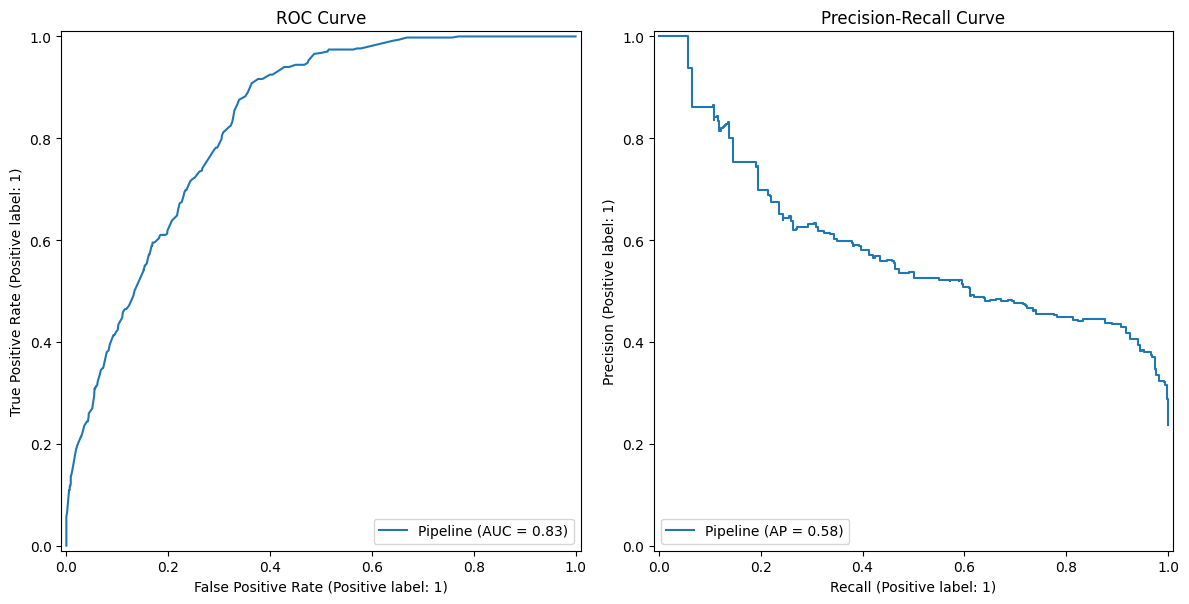

In [301]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

RocCurveDisplay.from_estimator(lgmb_tuning, x_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(lgmb_tuning, x_test, y_test, ax=ax2)

ax1.set_title('ROC Curve')
ax2.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

* Setelah dilakukan tuning pertama, model LightGBM menunjukkan performa yang baik secara umum dengan nilai ROC AUC sebesar 0.83. Ini menandakan bahwa model memiliki kemampuan yang solid dalam membedakan antara kelas positif dan negatif. Peningkatan recall dari 0.84 ke 0.86 setelah dua tahap tuning juga tercermin dalam kurva ROC yang tetap stabil, menunjukkan bahwa model semakin sensitif terhadap kelas minoritas tanpa mengorbankan kemampuan diskriminatif secara keseluruhan.
* Pada sisi lain, kurva Precision-Recall menunjukkan nilai average precision (AP) sebesar 0.58, yang mencerminkan trade-off yang jelas antara recall dan precision. Peningkatan recall dari tuning menyebabkan penurunan precision, artinya model menjadi lebih agresif dalam mengidentifikasi kelas positif, namun dengan konsekuensi munculnya lebih banyak false positive. Trade-off ini merupakan hal yang umum pada dataset tidak seimbang, terutama saat recall dijadikan prioritas utama.

## Concfusion Matrix

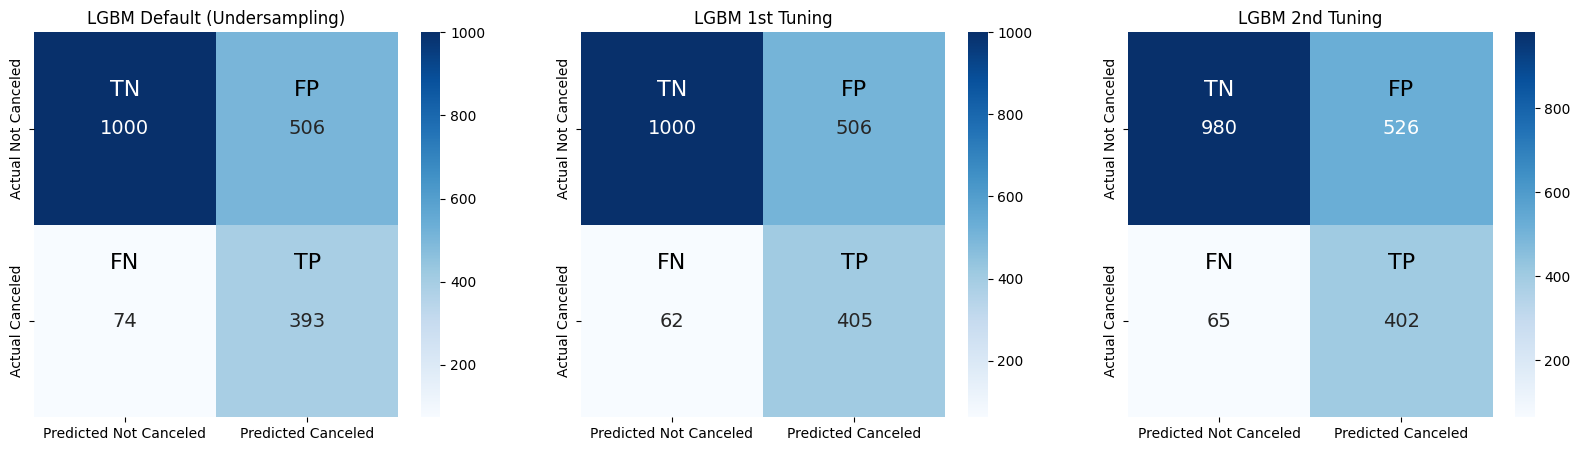

In [313]:
# Get the confusion matrix for before tuning, 1st tuning, and 2nd tuning
default = confusion_matrix(y_test, y_pred_default)
tuned = confusion_matrix(y_test, y_pred_tuned)
tuned2 = confusion_matrix(y_test, y_pred_tuned2)

CM_models = {
    'LGBM Default (Undersampling)': default,
    'LGBM 1st Tuning': tuned,
    'LGBM 2nd Tuning': tuned2
}

# Display confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for ax, (model_name, cm) in zip(axes, CM_models.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={'size': 14})
    ax.set_title(model_name)
    ax.xaxis.set_ticklabels(['Predicted Not Canceled', 'Predicted Canceled'])
    ax.yaxis.set_ticklabels(['Actual Not Canceled', 'Actual Canceled'])
    # kasih label TP, TN, FP, FN di confusion matrix
    ax.text(0.5, 0.3, 'TN', ha='center', va='center', fontsize=16, color='w')
    ax.text(1.5, 0.3, 'FP', ha='center', va='center', fontsize=16, color='black')
    ax.text(0.5, 1.2, 'FN', ha='center', va='center', fontsize=16, color='black')
    ax.text(1.5, 1.2, 'TP', ha='center', va='center', fontsize=16, color='black')

Berdasarkan hasil confusion matrix, **model LGBM 1st Tuning** merupakan pilihan terbaik untuk permasalahan ini. Model ini memiliki **False Negative (FN)** terendah, yaitu **62**, artinya model ini paling baik dalam mengenali reservasi yang akan dibatalkan — hal yang sangat krusial dalam konteks bisnis hotel, karena pembatalan yang tidak terdeteksi dapat menyebabkan kerugian pendapatan. Selain itu, model ini memiliki **True Positive (TP)** tertinggi sebesar **405**, yang menunjukkan kemampuannya dalam mendeteksi pembatalan secara akurat.

Sementara itu, model **LGBM Default** memiliki FN sebesar **74**, sedikit lebih tinggi dari 1st Tuning, dan TP yang lebih rendah (**393**). Model **LGBM 2nd Tuning** memiliki FN **65** dan TP **402**, namun True Negative (TN)-nya turun menjadi **980**, serta False Positive (FP) naik ke **526**, lebih tinggi dibandingkan 1st Tuning yang memiliki TN **1000** dan FP **506**.

Dalam skenario ini, menekan False Negative lebih penting dibandingkan mengurangi False Positive karena kesalahan dalam tidak mendeteksi pembatalan (FN) berdampak langsung pada kehilangan pendapatan, sementara False Positive berdampak lebih ringan. Oleh karena itu, dengan keseimbangan terbaik antara TP tinggi dan FN rendah, **LGBM 1st Tuning merupakan model yang paling unggul** di antara ketiganya.


## Evaluation

Untuk membuat evaluasi dari model yang kita bangun, pertama-tama kita harus memperhatikan biaya apa saja yang kita hadapi dalam konteks pembatalan reservasi hotel, kemudian kita bandingkan jika tidak memakai machine learning bagaimana dan jika memakai machine learning bagaimana dari segi bisnis. Biaya utama yang menjadi permasalahan utama dalam problem ini adalah:
* **Biaya Kehilangan Pendapatan Akibat Pembatalan (Fokus utama)** <br>
Biaya kehilangan pendapatan adalah biaya utama yang muncul ketika seorang pelanggan membatalkan reservasi. Hotel kehilangan pendapatan dari kamar yang seharusnya terisi, dan jika kamar tersebut tidak dapat diisi kembali, maka hotel akan kehilangan 100% pemasukan seharga kamar tersebut.
* **Biaya untuk Mencegah Pembatalan** <br>
Dalam konteks ini, biaya untuk mencegah pembatalan adalah biaya yang dikeluarkan oleh hotel untuk memberikan diskon atau insentif kepada pelanggan yang berisiko membatalkan reservasi mereka, misalnya jika hotel memberikan diskon 10% maka pendapatan yang diterima adalah sebesar 90% dari hotel saja.

Seandainya jika ada 467 (TP+FN) kasus pembatalan booking dan harga sewa kamar 1 malam adalah 400.000, maka:

Sumber : [Jakarta Average Hotel Costs](https://www.budgetyourtrip.com/hotels/indonesia/jakarta-1642911)

**Tanpa Menggunakan Machine Learning** <br>

Tanpa menggunakan Machine Learning, tentunya hotel tidak bisa memprediksi secara dini sebelum pembatalan itu benar-benar terjadi. Dalam skenario ini hotel hanya tahu jumlah pembatalan yang telah terjadi. Jadi, jika memiliki 462 pembatalan sebagai data aktual, maka hotel akan menanggung kerugian sebesar: <br>
* 467 x 400.000 =  186.800.000<br>

Hotel tidak bisa melakukan antisipasi sehingga menanggung biaya sebesar 186.800.000, yang semestinya nominal ini dapat menjadi pendapatan jika hotel bisa melakukan antisipasi dini.

**Dengan Mennggunakan Machine Learning** <br>
Pada skenario dengan model machine learning, jumlah pembatalan yang diprediksi oleh model adalah 467 (dari TP + FN), model dapat memprediksi sebagian besar pembatalan yang terjadi yaitu True Positive (TP) sebesar 393, tetapi masih ada False Negative (FN) yaitu pembatalan yang tidak terdeteksi oleh model dan disalah artikan sebagai tidak dibatalkan sebesar 62, kemudian ada juga False Positive (FP) yang konsekuensinya adalah tim marketing salah sasaran dalam memberikan diskon untuk mencegah pembatalan booking sebanyak 506, maka model dapat maka perhitungannya : <br>
* **(TN x 0) + (TP x 10% HARGA KAMAR) + (FN x HARGA KAMAR) + (FP x 10% HARGA KAMAR**) <br>
* (1000 x 0) + (405 x 40.000) + (62 x 400.000) + (506 x 40.000) = 61.240.000 <br>

Jadi, dengan menggunakan model machine learning, hotel dapat memprediksi dan mengurangi kerugian akibat pembatalan yang tidak terdeteksi sebesar 61.240.000 IDR, yang berarti penurunan kerugian sebesar **67%**. <br>
Dalam perhitungan ini, True Positive (TP) dikalikan dengan 10% harga kamar, karena tim marketing akan memberikan promo atau diskon sebesar 10% dari harga kamar kepada customer yang berpotensi cancel. False Negative (FN) dikalikan dengan harga kamar penuh yang artinya model salah memprediksi transaksi yang tidak akan cancel, namun sebenarnya cancel, sehingga terlewat oleh model. False Positive (FP) juga dikalikan dengan 10% harga kamar, karena model salah memprediksi transaksi yang tidak akan cancel, namun dianggap cancel, sehingga tim marketing salah sasaran dalam memberikan diskon. Sedangkan True Negative (TN) dikalikan dengan 0 karena tidak ada biaya terkait jika tidak ada pembatalan booking.

## Feature Importances

In [303]:
importance = lgmb_tuning.named_steps["model"].feature_importances_
feature_names = lgmb_tuning.named_steps["preprocess"].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df['Normalized'] = importance_df['Importance'] / importance_df['Importance'].sum()

In [304]:
importance_df = importance_df.sort_values(by='Normalized', ascending=True)
importance_df = importance_df[importance_df["Normalized"]>0]
# importance_df

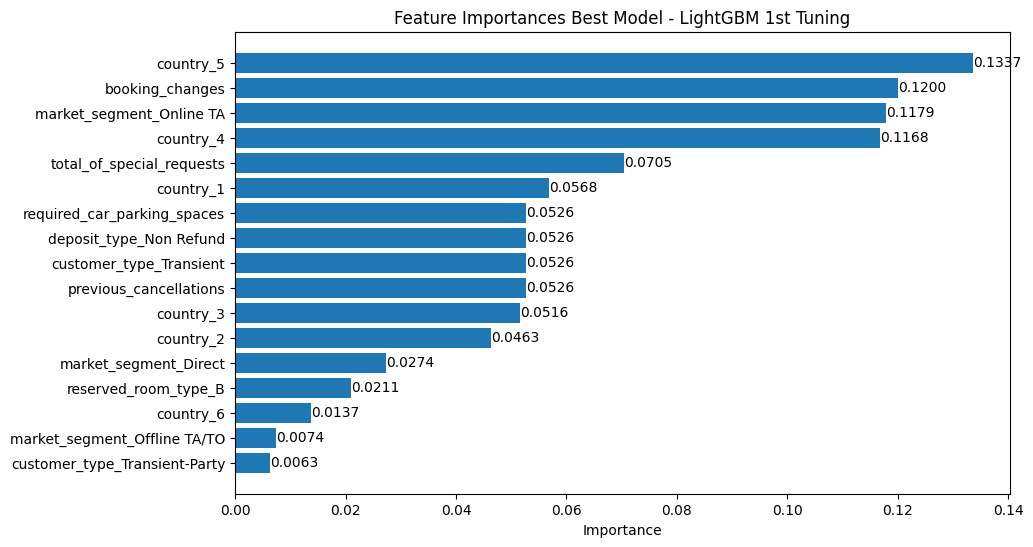

In [305]:
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Normalized'])
plt.xlabel("Importance")
plt.title("Feature Importances Best Model - LightGBM 1st Tuning")

# Add labels to each bar
for bar in bars:
    width = bar.get_width()  # get the width of each bar (the importance value)
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', 
            va='center', ha='left', color='black', fontsize=10)

plt.show()

Hasil model LightGBM yang menjadi best model menunjukkan bahwa `country_5` memiliki pengaruh paling besar terhadap prediksi pembatalan, dengan nilai importance sebesar **0.1337**. Hal ini menunjukkan bahwa asal negara pelanggan sangat memengaruhi kemungkinan pembatalan, mungkin karena perbedaan kebiasaan atau kondisi tertentu dari negara tersebut. Fitur `booking_changes` (**0.1200**) juga berperan besar, mengindikasikan bahwa pelanggan yang sering mengubah pesanan cenderung lebih sering membatalkan. `market_segment_Online TA` (**0.1179**) menempati posisi ketiga, memperkuat temuan bahwa pemesanan melalui agen perjalanan online memiliki kecenderungan pembatalan yang lebih tinggi. Selain itu, `country_4` (**0.1168**) dan `total_of_special_requests` (**0.0705**) juga menjadi faktor penting, yang mengindikasikan bahwa pelanggan dari negara tertentu dan yang memiliki permintaan khusus lebih berpotensi membatalkan reservasi.


# Conclusion & Recommendation

## Conclusion

Dengan menggunakan model machine learning, hotel berhasil memprediksi dan mengurangi kerugian akibat pembatalan yang tidak terdeteksi secara signifikan, meskipun masih ada biaya terkait dengan prediksi yang salah. Dalam skenario tanpa machine learning, hotel harus menanggung kerugian sebesar 186.800.000 IDR karena tidak dapat melakukan antisipasi terhadap pembatalan. Namun, dengan model machine learning, kerugian dapat dikurangi menjadi 61.240.000 IDR, yang menunjukkan pengurangan kerugian sebesar **67%**. Meskipun ada biaya terkait dengan diskon untuk pelanggan yang salah diprediksi (False Positive) dan kerugian akibat pembatalan yang terlewat (False Negative), penggunaan machine learning memungkinkan hotel untuk lebih efisien mengelola risiko pembatalan, mengurangi kerugian, dan meningkatkan pendapatan yang hilang.

## Recommendation

1. **Fokus pada Pelanggan Berisiko Pembatalan** <br>
Dengan menggunakan model prediksi, tim pemasaran dapat mengidentifikasi pelanggan yang berisiko tinggi membatalkan reservasi. Dengan demikian, hotel bisa mengambil langkah-langkah proaktif seperti memberikan diskon, upgrade kamar, atau penawaran khusus sebelum pembatalan terjadi.

1. **Meningkatkan Pengelolaan Hunian Kamar** <br>
Prediksi pembatalan memungkinkan hotel untuk mengelola tingkat hunian kamar secara lebih efisien. Dengan mengetahui kemungkinan pembatalan lebih awal, hotel dapat melakukan penyesuaian harga dinamis, mengisi kembali kamar kosong dengan lebih cepat, atau menawarkan penawaran promosi khusus untuk menarik pelanggan baru. Ini akan mengurangi dampak dari kerugian pendapatan akibat pembatalan mendadak dan memastikan bahwa kamar terisi dengan lebih efisien.

1. **Mengurangi Potensi Kerugian Melalui Pemberian Insentif yang Terencana** <br>
Memberikan insentif kepada pelanggan dengan risiko pembatalan lebih tinggi bisa meminimalkan kerugian dari pembatalan mendadak. Misalnya, jika sistem memprediksi pembatalan pada pelanggan tertentu, tim pemasaran bisa langsung menawarkan promo waktu terbatas atau diskon tertentu untuk memastikan pelanggan tetap melanjutkan reservasi mereka. 

1. **Optimalisasi Strategi Pemasaran** <br>
Berdasarkan hasil feature importances, tim marketing dapat memanfaatkan fitur-fitur seperti asal negara pelanggan, segmen pasar, dan riwayat perubahan dalam reservasi, sehingga dapat menyusun kampanye pemasaran yang lebih terfokus. Misalnya, pelanggan dari segmen Online TA atau pelanggan dengan permintaan khusus lebih berisiko membatalkan. Dengan data ini, pemasaran dapat menyesuaikan penawaran mereka untuk meminimalkan pembatalan mendadak.

In [306]:
# Save the model
joblib.dump(lgmb_tuning, "../models/lgbm_tuning.pkl")

['../models/lgbm_tuning.pkl']